# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `8` | `Questions`
#### YU Lingfeng Draft 2

> Hi, Team. 👋

> As discussed, throughout our semester, I’ve been doing my best to pace your learning while expanding your expertise and providing a novel framework that you could deploy in real-world practices. I kept revising all the lecture materials and exercise problem-sets so they aligned with your level of understanding.

> As you will see from the class email, I have revised the current exercise questions more than usual, as I found that the submission rate for the previous exercise problem-sets was less than ideal.

> This week’s exercise questions, as always, are intended to help you integrate what you have learned in the course, rather than test you. Please do as much as you can and feel free to submit your work, so that I can capture where you stand and pace your learning more precisely. 

> The questions below aren’t difficult as they ask incremental expansion of (with logical progression of) some of the questions you solved in previous exercise problem-sets.

> Hope you find them helpful!"🤞

    NOTE: As highlighted in class, the current exercise problem-sets have been released early to ensure our discussion leaders have ample preparation time. However, for the more extensive Question 2 on Hierarchical Clustering, I'd recommend waiting and beginning your work on it after our class next Tuesday.

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
# !pip install pandas-datareader
# !pip install yfinance

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

#### For question clustering

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [5]:
import matplotlib.ticker as ticker
from itertools import cycle

In [6]:
# !pip install threadpoolctl==3.1.0
# !pip install numpy==1.21.4
import numpy as np
import threadpoolctl 
# !pip install -U scikit-learn
import sklearn

print(sklearn.show_versions()
     )


System:
    python: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
executable: C:\ProgramData\anaconda3\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.2
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: 3.0.3
       pandas: 2.1.1
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
         prefix: mkl_rt
       filepath: C:\ProgramData\anaconda3\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel
    num_threads: 4

       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\lingf\AppData\Roaming\Python\Python311\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 8
None


> Let's set some print option.

In [7]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from statsmodels.tsa.stattools import coint

> PCA portfolio related libraries

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

## 👇 <font color = "purple"> Bigger Question 1. ### 

### The first expanded question is where you will execute principal component analysis (PCA) for portfolio management.
    
    As noted in the lesson, the principal components of the correlation matrix capture 
    most of the covariation among assets in descending order and are mutually uncorrelated.
    
    Importantly, we can employ standardized principal components as portfolio weights.
    
    Randomly choose 40 stock tickers among the stock tickers from below DF.
    
> Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period to “the market”, 
    assess the performance of other portfolios that capture different return patterns.
    
> Please use 80% of your data for PCA and 20% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 11 years between 2009 and 2019.

In [10]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### Below are the lines of code that lead to an answer:

In [11]:
seed = 627
# Use the sample method to draw a random sample of 40 rows
R40 = list_of_tickers.sample(n=40, random_state=seed)
R40 = R40.sort_index()
R40

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
18,ALLE,Allegion,Industrials,Building Products,"Dublin, Ireland",2013-12-02,1579241,1908
49,T,AT&T,Communication Services,Integrated Telecommunication Services,"Dallas, Texas",1983-11-30,732717,1983 (1885)
55,AXON,Axon Enterprise,Industrials,Aerospace & Defense,"Scottsdale, Arizona",2023-05-04,1069183,1993
76,BMY,Bristol Myers Squibb,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,14272,1989 (1887)
82,CHRW,C.H. Robinson,Industrials,Air Freight & Logistics,"Eden Prairie, Minnesota",2007-03-02,1043277,1905
106,CVX,Chevron Corporation,Energy,Integrated Oil & Gas,"San Ramon, California",1957-03-04,93410,1879
122,CMCSA,Comcast,Communication Services,Cable & Satellite,"Philadelphia, Pennsylvania",2002-11-19,1166691,1963
129,COO,CooperCompanies,Health Care,Health Care Supplies,"San Ramon, California",2016-09-23,711404,1958
139,CVS,CVS Health,Health Care,Health Care Services,"Woonsocket, Rhode Island",1957-03-04,64803,1996
151,DFS,Discover Financial,Financials,Consumer Finance,"Riverwoods, Illinois",2007-07-02,1393612,1985


### <font color = red> Answer 1 is presented in the cell below: </font>

In [12]:
R40.iloc[:, 0].values

array(['ALLE', 'T', 'AXON', 'BMY', 'CHRW', 'CVX', 'CMCSA', 'COO', 'CVS',
       'DFS', 'DIS', 'DUK', 'DD', 'EPAM', 'EL', 'EXPE', 'FMC', 'FTV',
       'GRMN', 'HRL', 'IBM', 'IVZ', 'KLAC', 'LRCX', 'MAS', 'MET', 'MCO',
       'NKE', 'OKE', 'PCG', 'PGR', 'REGN', 'RCL', 'SHW', 'SNA', 'TPR',
       'UAL', 'UHS', 'VRTX', 'WYNN'], dtype=object)

In [13]:
DATA = yf.download(list(R40.iloc[:, 0].values), start="2009-01-01", end="2020-01-01")
DATA

[*********************100%%**********************]  40 of 40 completed


Adj Close                                              \
                  ALLE       AXON        BMY       CHRW      CMCSA   
Date                                                                 
2009-01-02         NaN   5.410000  14.448823  39.939449   6.668797   
2009-01-05         NaN   5.570000  14.055533  38.437717   6.335113   
2009-01-06         NaN   5.510000  13.523083  38.258923   6.409513   
2009-01-07         NaN   5.370000  13.420223  37.050381   6.190034   
2009-01-08         NaN   5.650000  13.619893  36.692822   6.290473   
...                ...        ...        ...        ...        ...   
2019-12-24  118.123749  73.089996  55.617798  70.742195  40.490028   
2019-12-26  118.858032  72.900002  56.322266  71.079773  40.890102   
2019-12-27  118.810333  72.900002  56.480774  71.098007  41.008316   
2019-12-30  118.362137  73.510002  56.119743  70.742195  41.081055   
2019-12-31  118.762665  73.279999  56.524815  71.344330  40.890102   

                                                                     ...  \
                   COO        CVS         CVX         DD        DFS  ...   
Date                                                                 ...   
2009-01-02   18.500040  21.576403   42.841892  14.645638   7.362081  ...   
2009-01-05   18.827042  21.884850   42.920277  14.303504   7.547874  ...   
2009-01-06   19.471123  21.554369   43.306591  15.253903   7.516907  ...   
2009-01-07   19.035126  21.583744   41.408619  15.282412   6.913080  ...   
2009-01-08   19.124313  21.547022   41.565384  15.025806   6.889852  ...   
...                ...        ...         ...        ...        ...  ...   
2019-12-24  321.833069  66.720131  101.557030  59.294872  77.998924  ...   
2019-12-26  319.794434  66.693260  101.776436  59.248379  78.191017  ...   
2019-12-27  320.893616  66.621628  101.523277  59.248379  77.697113  ...   
2019-12-30  319.234772  65.994812  101.143509  57.909649  77.312973  ...   
2019-12-31  321.073578  66.523132  101.700493  59.685333  77.578209  ...   

             Volume                                                         \
                RCL    REGN      SHW     SNA         T       TPR       UAL   
Date                                                                         
2009-01-02  1590900  354700  4731600  425200  28968855   4016700   6439500   
2009-01-05  2532100  323700  4879200  586600  42917063   5743400   6124700   
2009-01-06  4758900  301600  5550900  686800  38059836   5864300  10396500   
2009-01-07  4295500  248600  5872800  819700  40425295   7888400   7087500   
2009-01-08  4301000  257000  5295000  436900  28374909  10547100   6810200   
...             ...     ...      ...     ...       ...       ...       ...   
2019-12-24   573600  221500   294300   55000  11515093   1412000    771100   
2019-12-26   820300  451900   453300  175000  26239032   1996500   1039700   
2019-12-27   624300  293000   525300  117500  20430247   2049000   1402100   
2019-12-30   803800  369200   696000  176500  23389652   2264200   1799900   
2019-12-31   814800  494600   867300  198900  26766646   2586200   2073700   

                                       
                UHS     VRTX     WYNN  
Date                                   
2009-01-02   788200  1216600  1361400  
2009-01-05  1416800  2331600  3101200  
2009-01-06  1610200  2055600  3161300  
2009-01-07  1821600  1703300  3278200  
2009-01-08  1317200  1867600  1616800  
...             ...      ...      ...  
2019-12-24   139400   300500   472100  
2019-12-26   176700   697000   978500  
2019-12-27   180000   904600  1401900  
2019-12-30   213600   774300  3063000  
2019-12-31   243400  1036400  1142600  

[2768 rows x 240 columns]

In [14]:
target = DATA[[('Adj Close')]].droplevel(0, axis = 1)
target

,ALLE,AXON,BMY,CHRW,CMCSA,COO,CVS,CVX,DD,DFS,...,RCL,REGN,SHW,SNA,T,TPR,UAL,UHS,VRTX,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,NaN,5.410000,14.448823,39.939449,6.668797,18.500040,21.576403,42.841892,14.645638,7.362081,...,12.571002,18.700001,16.673441,29.452465,7.173343,15.075108,11.870000,17.750362,30.690001,29.151955
2009-01-05,NaN,5.570000,14.055533,38.437717,6.335113,18.827042,21.884850,42.920277,14.303504,7.547874,...,12.755869,19.080000,16.631748,29.430973,6.931961,14.992963,11.450000,17.876095,32.150002,32.151985
2009-01-06,NaN,5.510000,13.523083,38.258923,6.409513,19.471123,21.554369,43.306591,15.253903,7.516907,...,12.436550,18.959999,16.790169,29.380823,6.900259,14.999814,12.060000,18.160135,31.629999,33.983971
2009-01-07,NaN,5.370000,13.420223,37.050381,6.190034,19.035126,21.583744,41.408619,15.282412,6.913080,...,11.268524,17.980000,16.553923,29.022511,6.764243,14.760193,12.060000,18.211349,31.520000,29.035143
2009-01-08,NaN,5.650000,13.619893,36.692822,6.290473,19.124313,21.547022,41.565384,15.025806,6.889852,...,10.377798,18.280001,16.979166,28.649876,6.756783,14.308349,12.770000,18.453484,31.770000,28.555639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,118.123749,73.089996,55.617798,70.742195,40.490028,321.833069,66.720131,101.557030,59.294872,77.998924,...,131.653198,376.510010,187.276260,153.153931,21.364210,24.642437,89.150002,140.741821,220.559998,137.602295
2019-12-26,118.858032,72.900002,56.322266,71.079773,40.890102,319.794434,66.693260,101.776436,59.248379,78.191017,...,132.851288,374.859985,187.424530,153.933670,21.473883,25.094004,89.260002,140.270447,220.250000,139.082535
2019-12-27,118.810333,72.900002,56.480774,71.098007,41.008316,320.893616,66.621628,101.523277,59.248379,77.697113,...,132.019547,373.320007,187.453506,153.407822,21.517754,24.771458,88.370003,140.771255,220.970001,137.967422


In [15]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [16]:
def PCA_portfolios(data_df, missing_rate, train_rate, NumEigenValues, NumComponents):
    data = data_df.copy()
    missing_values =\
    (
        data
        .isnull() # True (1) vs. False (0)
        .mean()
        .sort_values(ascending = False)
    )
    drop_list =\
    (
        sorted(list(missing_values[missing_values > missing_rate]
                    .index)
              )
    )
    data =\
    (
        data
        .drop(labels = drop_list,
              axis = 1)
    )    

    Daily_Linear_Return =\
    (
        data
        .pct_change(1)
    )

    # Operational defition of outliers = data points beyond 3 SD
    Daily_Linear_Return =\
    (
        Daily_Linear_Return[Daily_Linear_Return 
                            .apply(lambda x:(x - x.mean()
                                            ).abs() < (3 * x.std()
                                                      )
                                  )
                            .all(1)
        ]
    )
    scaler =\
    (
        StandardScaler()
        .fit(Daily_Linear_Return)
    )
    scaled_data =\
    (
        pd
        .DataFrame(scaler.fit_transform(Daily_Linear_Return),
                   columns = Daily_Linear_Return.columns,
                   index = Daily_Linear_Return.index)
    )

    prop =\
        int(len(scaled_data) * train_rate)

    X_Train = scaled_data[    : prop] # First 80% of the data
    X_Test  = scaled_data[prop:     ] # Remaining 20% of the data

    X_Train_Raw = Daily_Linear_Return[    :prop]
    X_Test_Raw  = Daily_Linear_Return[prop:    ]    

    stock_tickers =\
    (
     scaled_data
     .columns
     .values
    )    
    
    pca = PCA()
    PrincipalComponent = pca.fit(X_Train)
    
    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T


    # Extract the top principal components from the PCA object
    # and create a DataFrame with columns named after the original features

    topPortfolios =\
    (
        pd
        .DataFrame(pca.components_[ : NumComponents],
                   columns = data.columns)
    )

    # Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
    # This is done by dividing each weight by the sum of weights for the respective portfolio

    eigen_portfolios =\
    (
        topPortfolios
        .div(topPortfolios.sum(1),
             axis = 0)
    )

    # Rename the index of the eigen_portfolios DataFrame for better readability

    eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                             ]

    # Calculate the square root of the explained variance for each component
    # This provides the standard deviation of returns for each eigenportfolio
    np.sqrt(pca.explained_variance_)    
    
        
    # to find on eigen portfolios            
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_data.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    results = results.iloc[:NumEigenValues]
    
    #####
    fig, axes =\
    (
        plt
        .subplots(ncols = 2,
                  figsize = [16, 6]
                 )
    )

    # Plot on the left panel

    Series1 =\
    (
        pd
        .Series(pca
                .explained_variance_ratio_[ :NumEigenValues]
               )
        .sort_values()
        * 100
    )

    # Plot on the right panel

    Series2 =\
    (
        pd
        .Series(pca
                .explained_variance_ratio_[ :NumEigenValues]
               )
        .cumsum()
        * 100
    )

    (
        Series1
        .plot
        .barh(ylim = (0, 9),
              title = "Explained Variance Ratio by Top 10 PCs",
              ax = axes[0]
             )
    )

    (
        Series2
        .plot(ylim = (0, 100),
              xlim = (0, 9),
              title = "Cumulative Explained Variance by Each PC",
              ax = axes[1]
             )
    )
    
    return [weights, eigen_portfolios, results, X_Test_Raw, X_Test]

In [17]:
def view_eigen_portfolios(eigen_portfolios, NumComponents):
    (
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )  
    )
    return

In [18]:
# Yet another gift

def backtest_PCA_porfolios(data_list):
    X_Test_Raw = data_list[3]
    X_Test = data_list[4]
    for i in range(len(data_list[2])):
        stock_tickers = list(data_list[1].columns)
        eigen = data_list[0][data_list[2].index[i]]

        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": eigen.squeeze()
                                  },
                           index = stock_tickers)
            )

        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prtfi_returns =\
        (
            np
            .dot(X_Test_Raw
                 .loc[ : , eigen_prtfi.index],
                 eigen)
        )
        eigen_portfolio_returns =\
        (
            pd
            .Series(eigen_prtfi_returns.squeeze(),
                    index = X_Test_Raw.index)
        )

        returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

        print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
              (returns * 100, vol * 100, sharpe)
             )

        # Compared with what? Equal-weightage Portfolio

        equal_weight_return =\
        (
            X_Test_Raw * (1 / int(X_Test_Raw.shape[1])
                         )
        ).sum(axis = 1)
        df_plot =\
            (
                pd
                .DataFrame({f"ML Portfolio by weightage_{data_list[2].index[i]} Return": eigen_portfolio_returns,
                            "Equal Weight Index": equal_weight_return},
                          index = X_Test.index
                          )
            )

        (
            np
            .cumprod(df_plot + 1)
            .plot(title = f"Returns of the equal weighted index vs. Eigen-Portfolio_{i}",
                  figsize = [16, 8]
                 )
        )
        plt.show()
    return

Our Eigen Portfolio #0 with the highest Sharpe. Return 27.24%, vol = 13.41%, Sharpe = 2.03


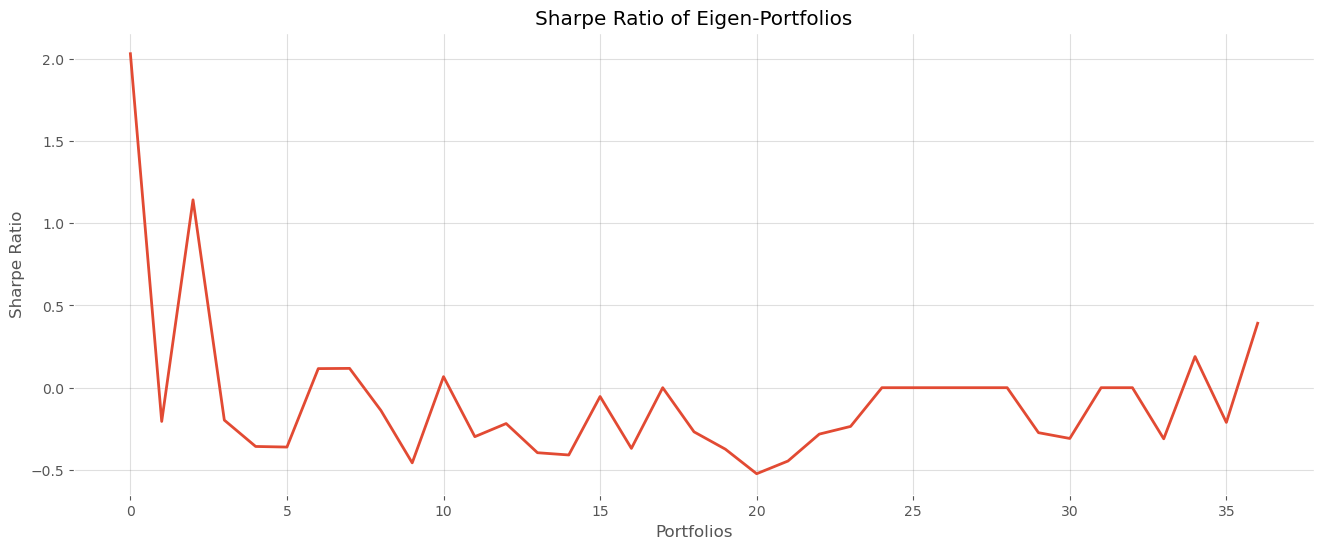

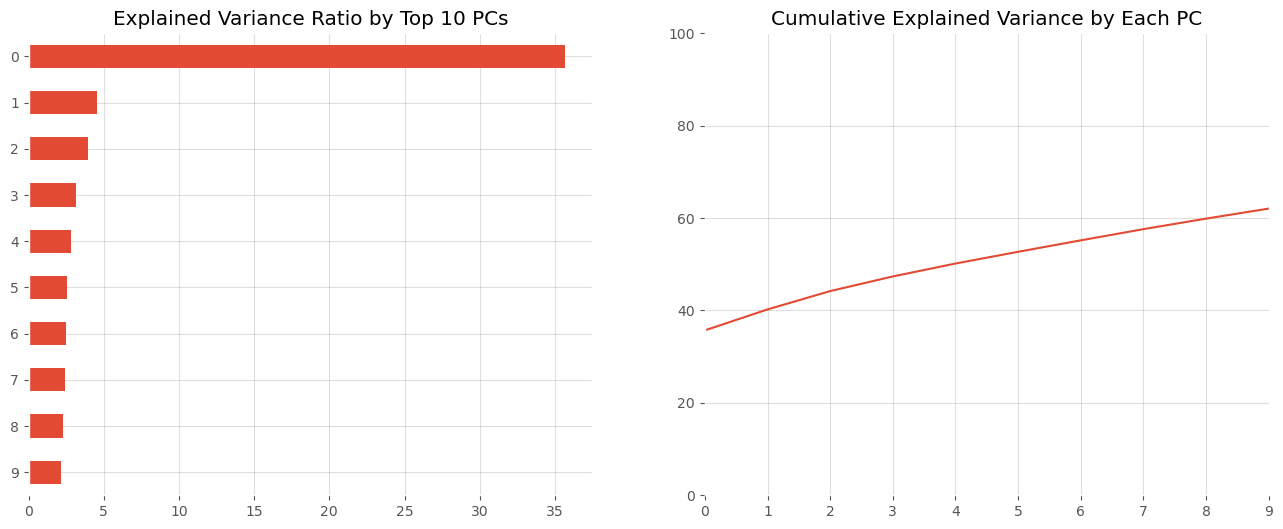

In [19]:
missing_data_rate = 0.25
train_ratio = 0.8
Num_Eigen = 10
Num_Components = 5
pca_result = PCA_portfolios(target, missing_data_rate, train_ratio, Num_Eigen, Num_Components)
#     pca_result =  [weights, eigen_portfolios, results, X_Test_Raw, X_Test]

In [20]:
type(pca_result[3])

pandas.core.frame.DataFrame

Our PCA-based Portfolio:
Return = 26.10%
Volatility = 11.62%
Sharpe = 2.25


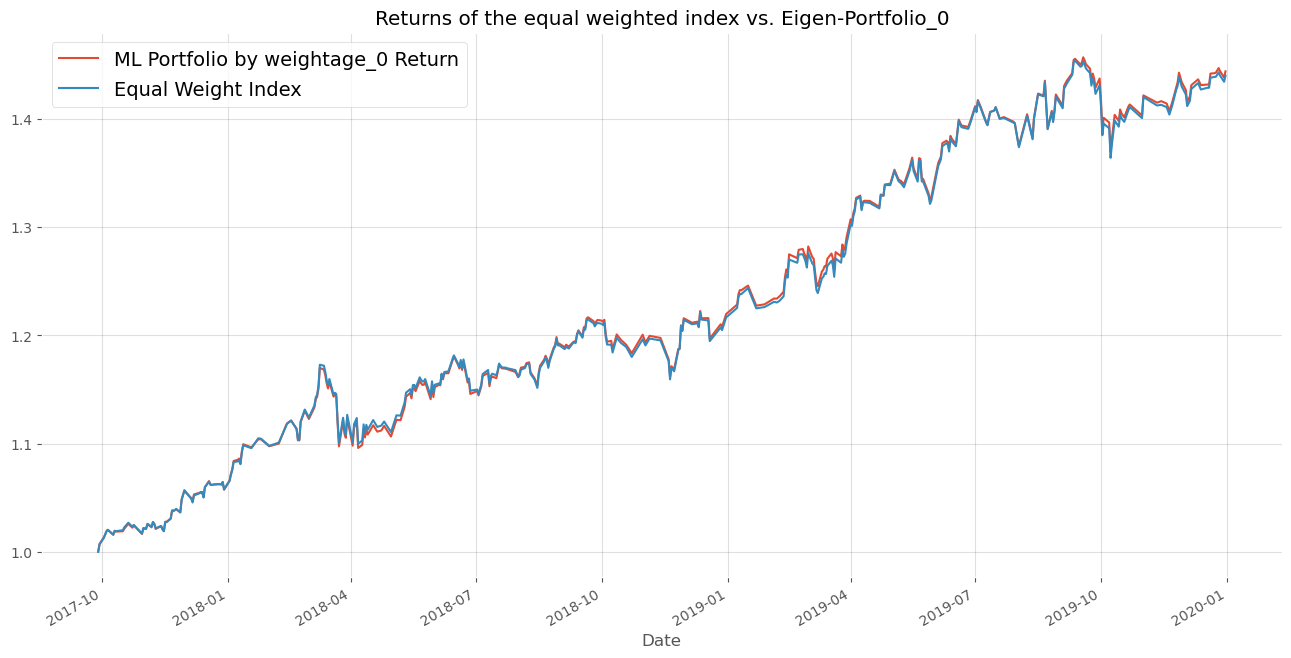

Our PCA-based Portfolio:
Return = 8.07%
Volatility = 30.53%
Sharpe = 0.26


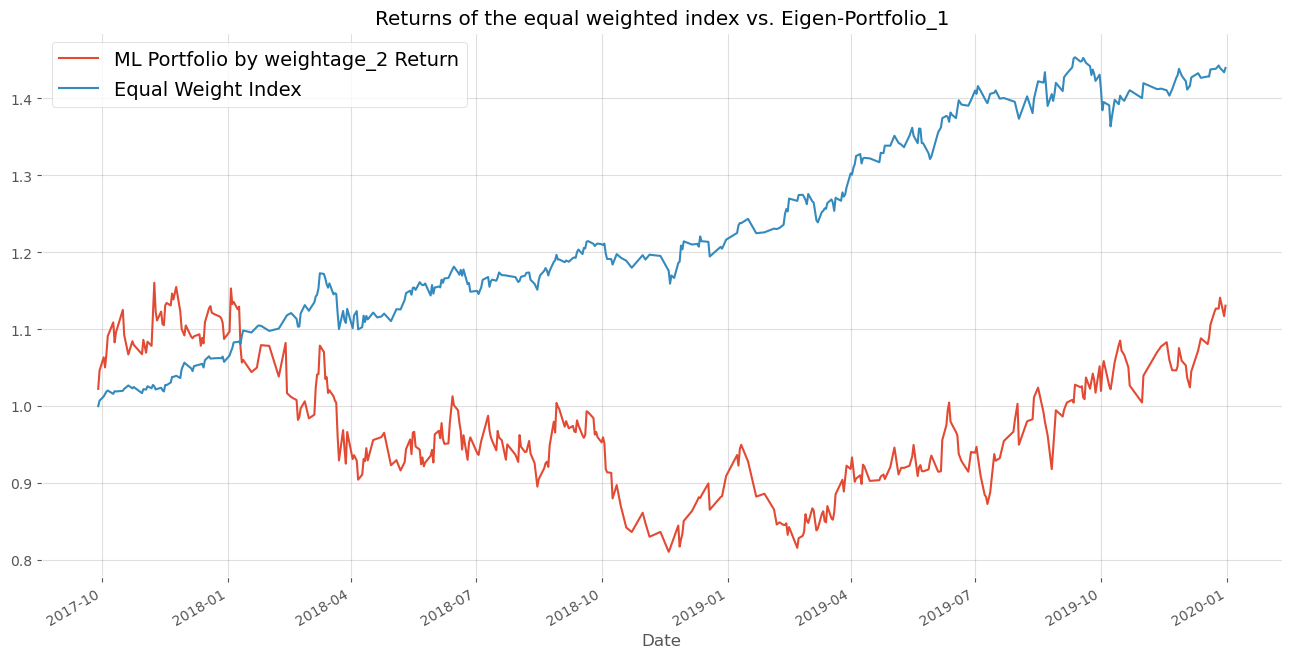

Our PCA-based Portfolio:
Return = -2.80%
Volatility = 47.81%
Sharpe = -0.06


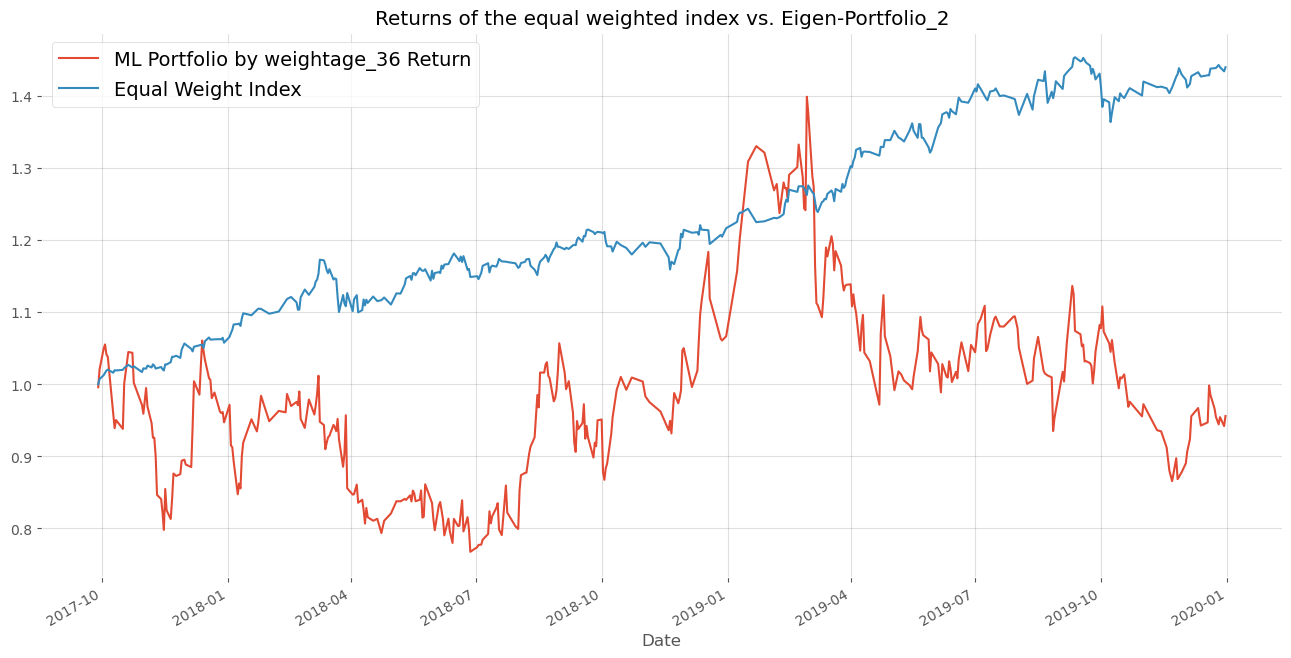

Our PCA-based Portfolio:
Return = 133.35%
Volatility = 94.70%
Sharpe = 1.41


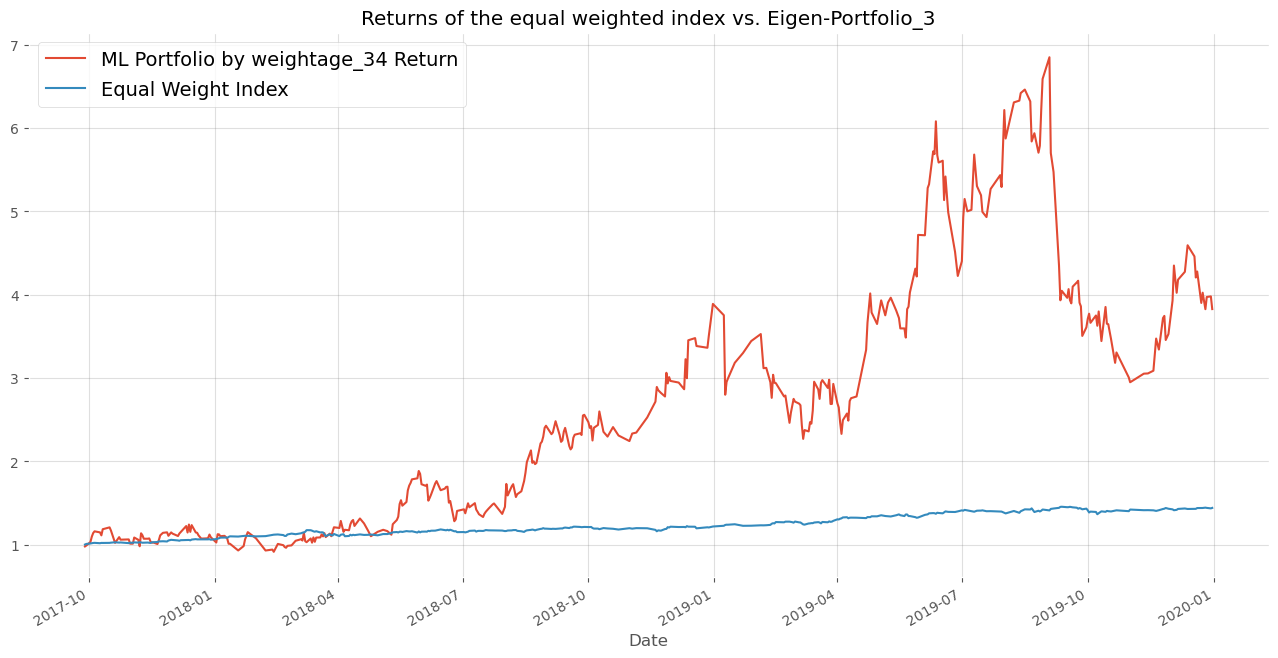

Our PCA-based Portfolio:
Return = 82.11%
Volatility = 57.55%
Sharpe = 1.43


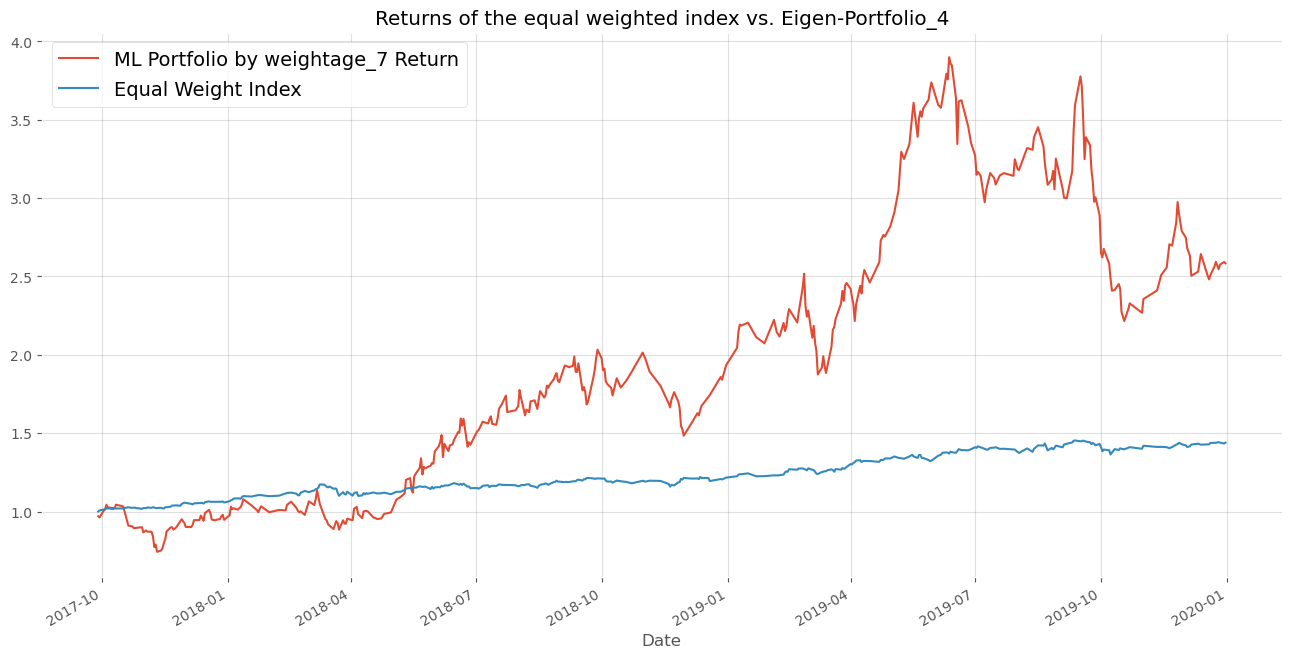

Our PCA-based Portfolio:
Return = 105.16%
Volatility = 69.62%
Sharpe = 1.51


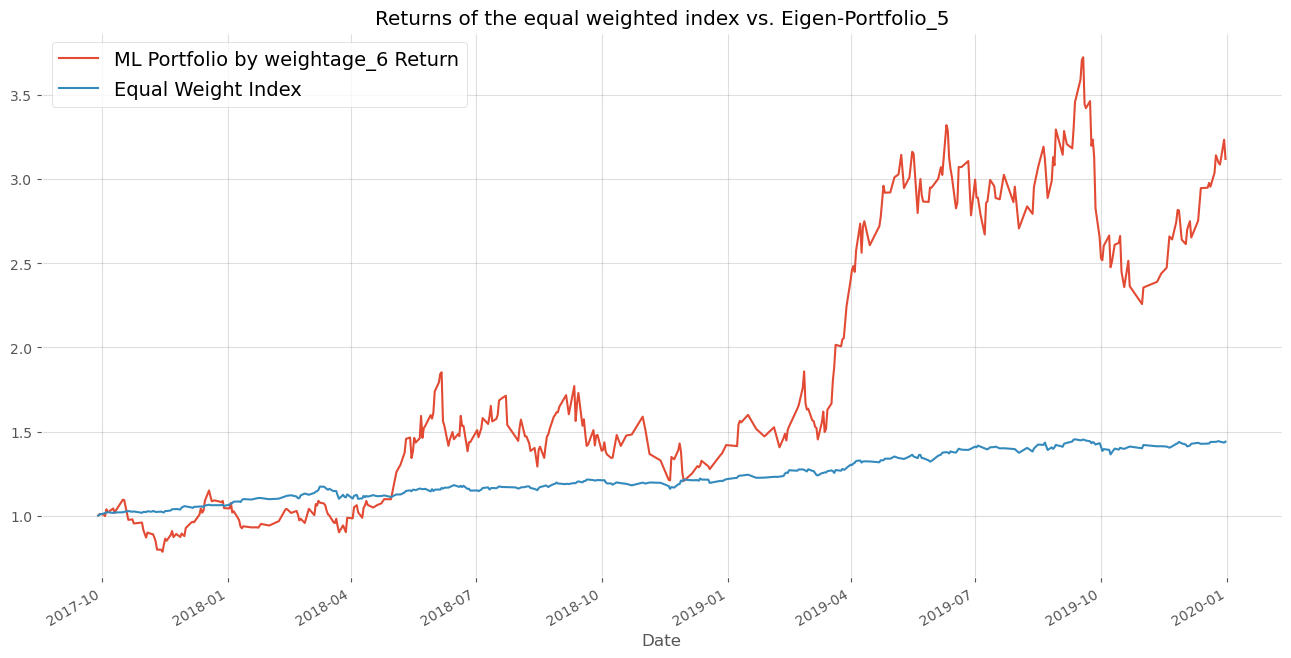

Our PCA-based Portfolio:
Return = 36.03%
Volatility = 83.20%
Sharpe = 0.43


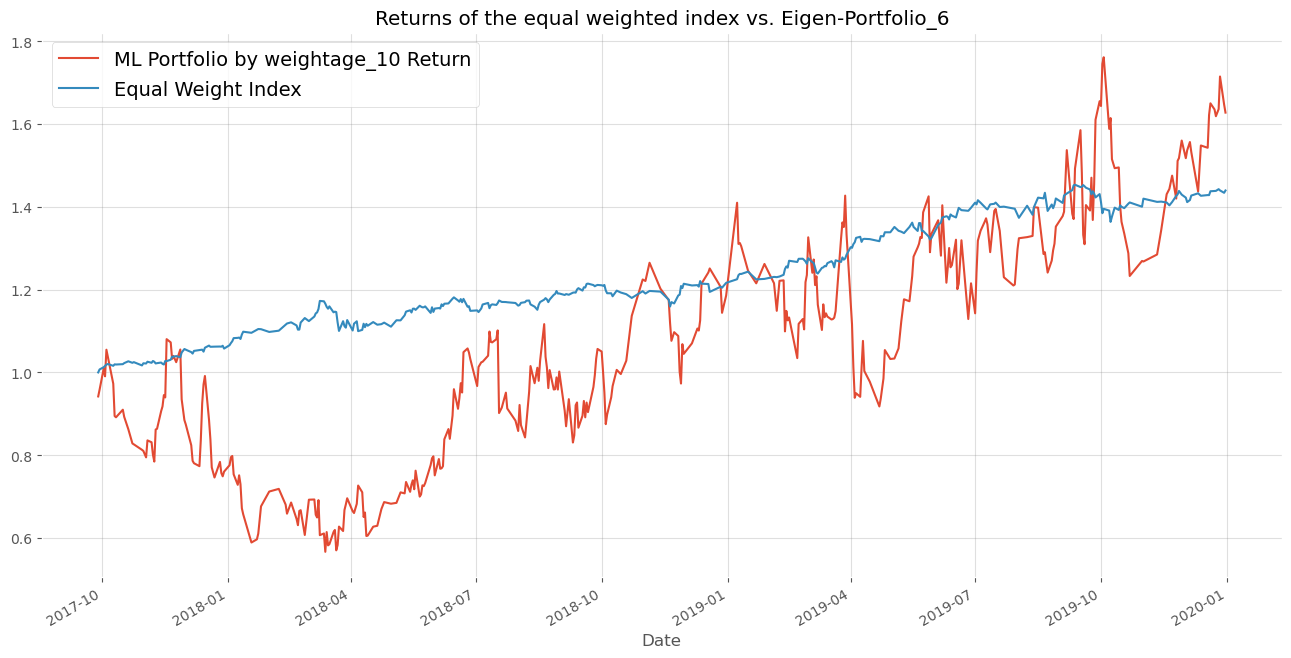

Our PCA-based Portfolio:
Return = -94.40%
Volatility = 155.47%
Sharpe = -0.61


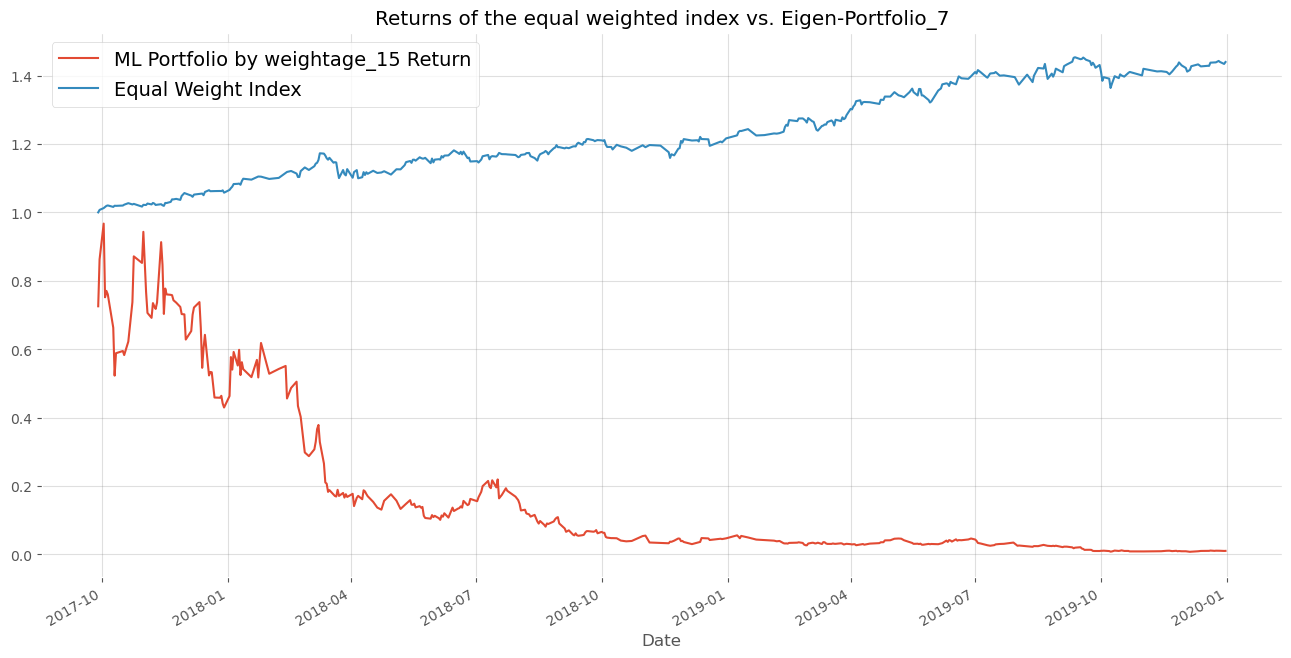

Our PCA-based Portfolio:
Return = -35.90%
Volatility = 101.84%
Sharpe = -0.35


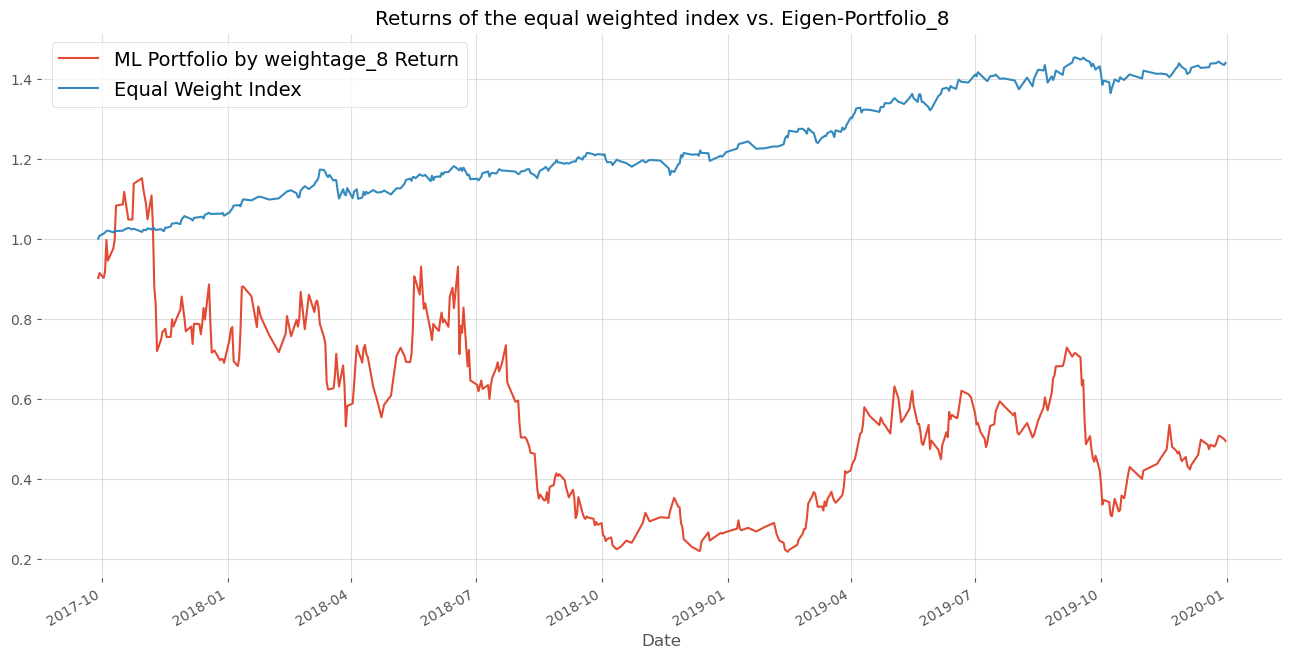

Our PCA-based Portfolio:
Return = 61.85%
Volatility = 159.96%
Sharpe = 0.39


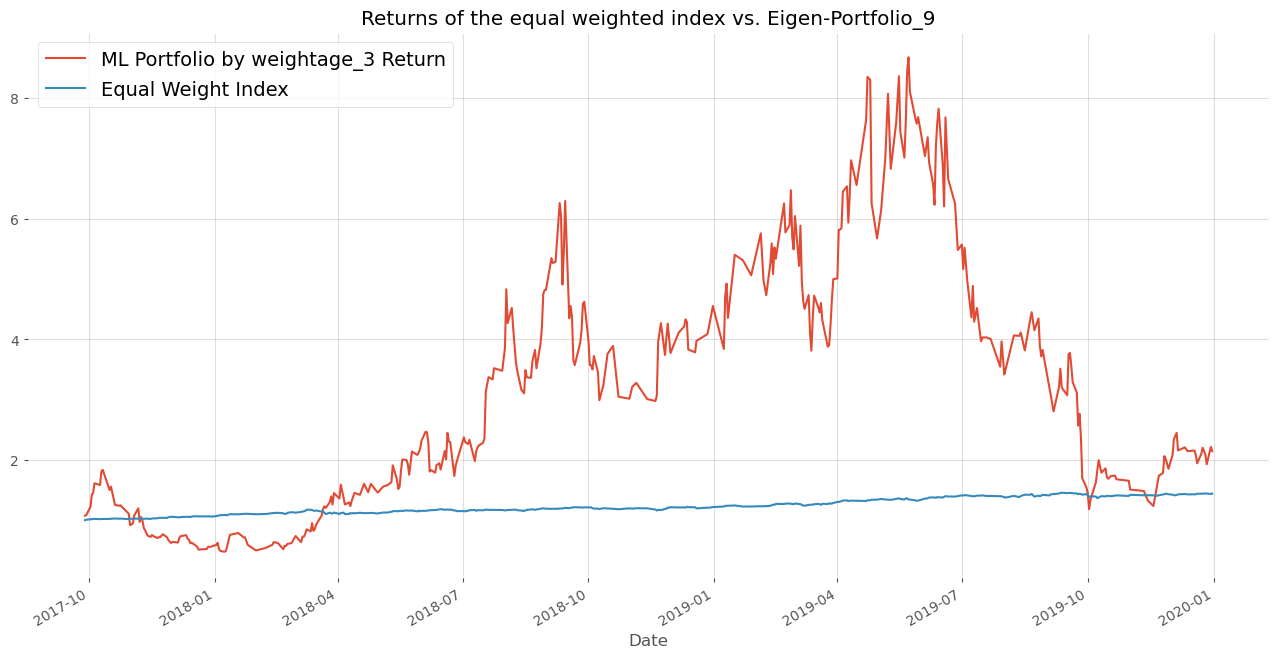

In [21]:
backtest_PCA_porfolios(pca_result)

In [22]:
pca_result[0][1]

array([-0.549,  0.062,  0.371,  0.246, -0.409,  0.379,  0.796, -0.052,
        0.008,  0.137,  1.957,  0.259, -0.538, -0.099, -0.303,  0.925,
        0.529, -0.065, -0.375, -0.551, -0.277, -0.128, -0.203, -0.027,
        0.803,  1.036,  0.501, -0.534, -0.962,  0.015, -0.038,  1.25 ,
       -0.273, -1.039, -0.401, -0.943, -0.506])

In [23]:
pca_result[1]

,AXON,BMY,CHRW,CMCSA,COO,CVS,CVX,DD,DFS,DIS,...,RCL,REGN,SHW,SNA,T,TPR,UAL,UHS,VRTX,WYNN
Portfolio 0,0.018006,0.022084,0.027119,0.029204,0.023886,0.023893,0.029755,0.033314,0.032397,0.032747,...,0.032067,0.020386,0.029156,0.035795,0.023232,0.026244,0.021537,0.025033,0.020092,0.024979
Portfolio 1,-0.548638,0.061995,0.371109,0.246494,-0.409014,0.378695,0.795630,-0.052101,0.007710,0.136951,...,-0.533723,-0.962318,0.015002,-0.038133,1.249937,-0.273351,-1.038612,-0.400810,-0.943210,-0.506050
Portfolio 2,0.045869,0.440833,-0.041147,0.027643,0.233649,0.132580,-0.161201,-0.259527,-0.165158,0.004579,...,-0.109269,0.508303,0.097371,-0.073911,0.093493,-0.061801,0.059706,0.202020,0.517381,-0.173564
Portfolio 3,0.417077,0.454720,-0.617859,-0.371879,-0.059544,-1.470929,2.612132,0.668452,-0.435339,-1.159383,...,-1.744965,1.382403,-0.244644,-0.265169,0.167457,-1.377477,-2.220787,0.727183,2.550104,0.639061
Portfolio 4,2.989043,-0.955365,0.252490,-0.283304,-0.101849,0.142894,-0.528109,-0.460776,-1.296546,-0.307405,...,-0.901807,0.416633,1.371569,0.501326,-0.800965,2.425261,-4.087976,-2.434934,-1.112937,-0.139830


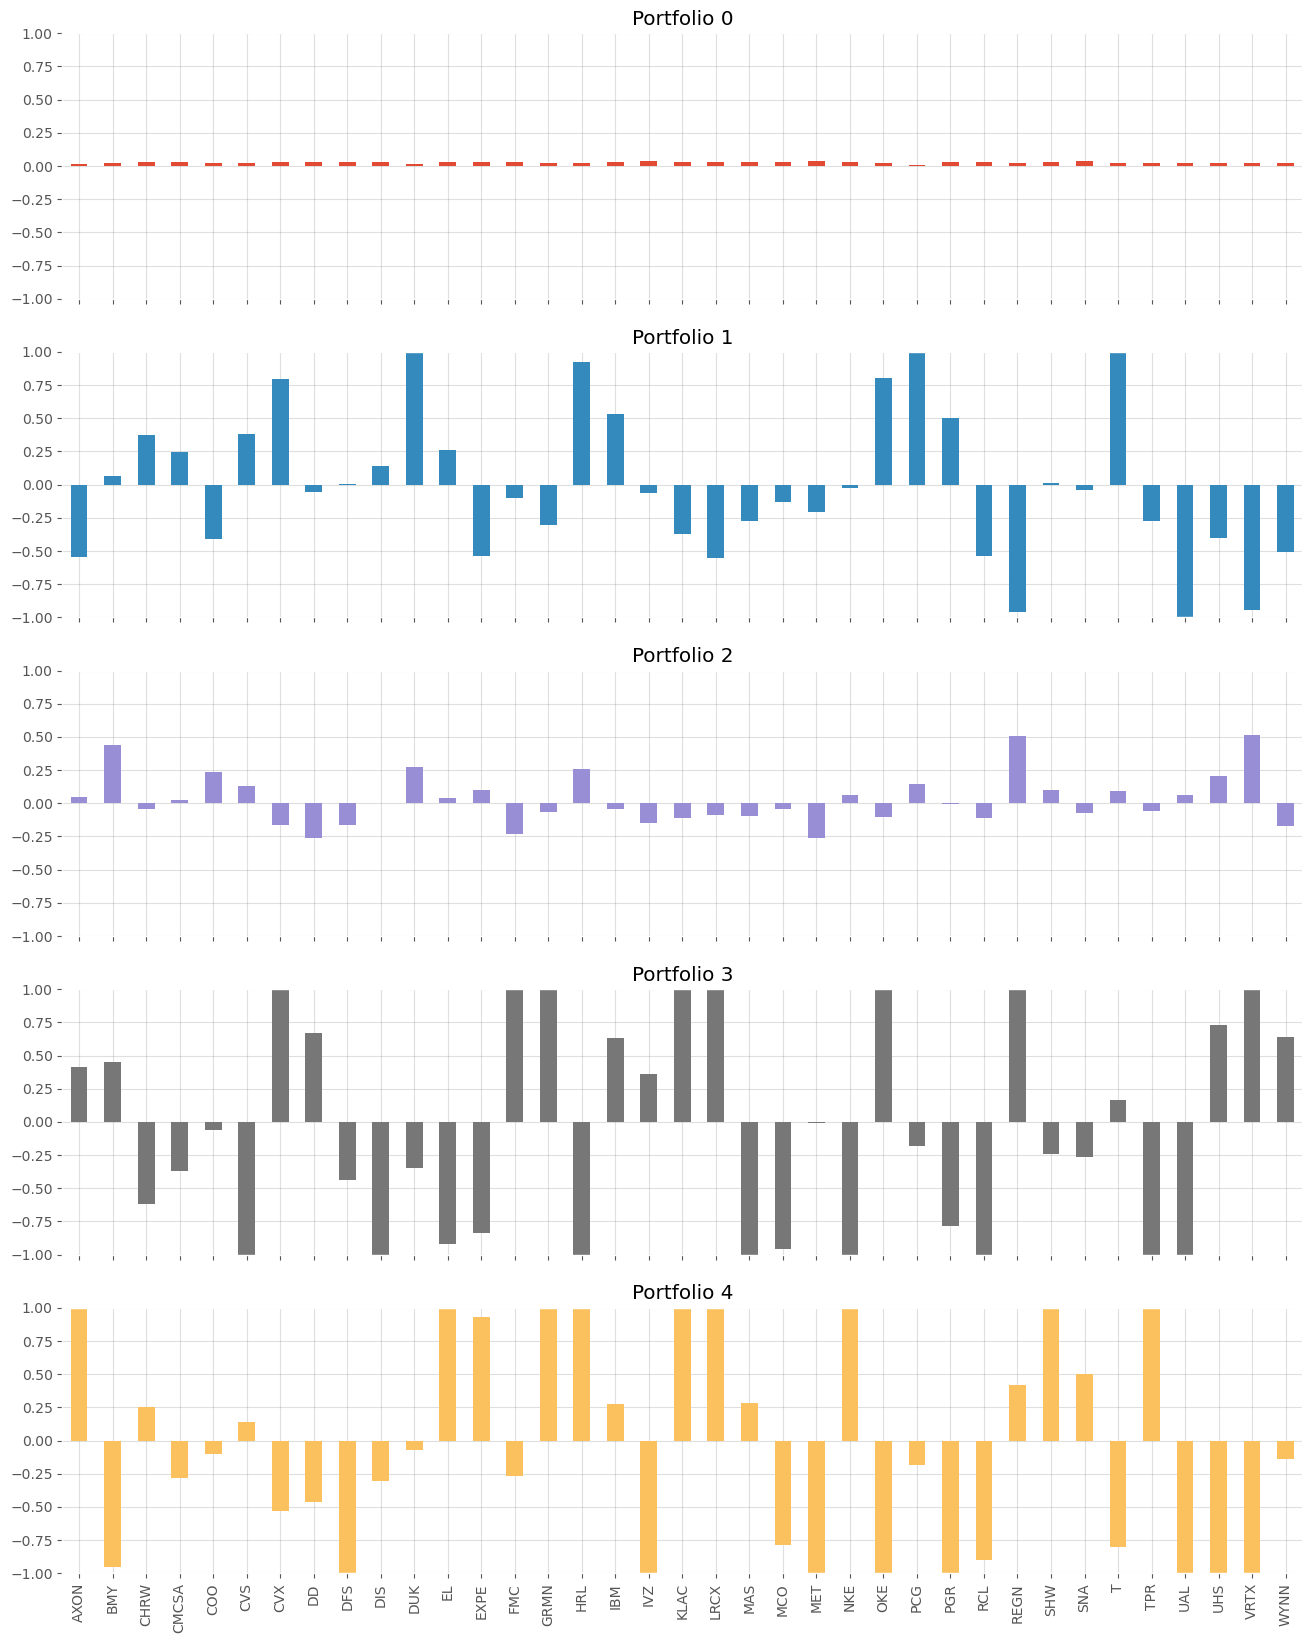

In [24]:
view_eigen_portfolios(pca_result[1], Num_Components)

1. from Training set data, top 4 porfolio is as weightage vector number [2, 36, 34, 7], also the following 5 is selected for comparison purposes. The weightage vector numbers are [6, 10, 15, 26, 8].
2. from the testing set data, the results show the out-performers are weightage vector number [34, 7], and [6, 10]

## 👇 <font color = "purple"> Bigger Question 2. The next question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).

> The primary advantage AGNES has over other clustering methods is that you don’t need to guess how many clusters there might be.
    
> Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It’s then up to a quant to choose a cut-off threshold and decide how many clusters are present.

> Linkage does the actual clustering in one line of code, and returns a list of the clusters.

> There are different options for measuring the distance. We will choose the average distance measurement option, but others are possible (ward, single, centroid, etc.).

### The best way to visualize an agglomerate clustering algorithm is through a dendrogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. 
    
### The distance between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.
    
### <font color = green> Using Dow data, based on what you learned in class, run the above analysis and come up with a dendrogram. According to the dendrogram, which of the stocks are most correlated? Also based on the dendrogram, please identify two stocks that are not well correlated.

### Below are the lines of code that lead to an answer:

In [25]:
dow =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/dow_pca-hemx.csv",
              index_col = 0)
)
dow

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-25,195.900000,100.770000,157.760000,364.200000,136.860000,113.220000,46.130000,47.370000,111.090000,57.76,...,80.610000,40.298248,93.600000,124.980000,115.810000,268.050000,56.400000,138.67,96.940000,71.890000
2019-01-28,193.200000,100.380000,156.300000,362.970000,124.370000,112.170000,45.750000,47.170000,110.810000,58.13,...,80.320000,39.197582,93.520000,125.030000,115.080000,266.770000,55.070000,135.99,97.060000,71.580000
2019-01-29,196.950000,100.960000,154.680000,364.910000,126.530000,111.830000,45.960000,47.400000,110.900000,58.52,...,80.220000,40.427155,93.540000,124.820000,117.840000,267.340000,53.280000,135.00,96.710000,71.500000


In [26]:
dow.shape

(4800, 30)

In [27]:
def clean_dataset(dataset, threshold):
    Missing_Values =\
    (
          dataset
          .isnull()
          .values
          .any()
     )
    print(f"Missing Values? = {Missing_Values}")
    if Missing_Values:
        missing_fractions = \
            dataset \
            .isnull() \
            .mean() \
            .sort_values(ascending = False)
        drop_list =\
            sorted(list(missing_fractions
                        [missing_fractions > 0.3]
                        .index)
                   )
        dataset =\
            dataset \
            .drop(labels= drop_list, 
                  axis=1)
    # Fill the missing values with the last value available in the dataset. 
    dataset = dataset.fillna(method = "ffill")
    return dataset

In [28]:
dataset = clean_dataset(dow, 0.3)

Missing Values? = True


In [29]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    dataset
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

returns["Volatility"] =\
(    
     dataset
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns

# You may format the data as a numpy array to feed into the K-Means algorithm

data =\
(
    np
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])]).T
)

data

array([[0.126, 0.23 ],
       [0.119, 0.355],
       [0.29 , 0.409],
       [0.185, 0.3  ],
       [0.168, 0.322],
       [0.12 , 0.254],
       [0.081, 0.391],
       [0.076, 0.206],
       [0.126, 0.299],
       [0.088, 0.241],
       [0.121, 0.371],
       [0.122, 0.309],
       [0.06 , 0.259],
       [0.095, 0.371],
       [0.099, 0.191],
       [0.147, 0.392],
       [0.131, 0.23 ],
       [0.08 , 0.271],
       [0.1  , 0.306],
       [0.195, 0.3  ],
       [0.08 , 0.248],
       [0.08 , 0.21 ],
       [0.137, 0.289],
       [0.126, 0.266],
       [0.25 , 0.314],
       [0.077, 0.247],
       [0.065, 0.239],
       [0.101, 0.275]])

### <font color = red> Answer 2 is presented in the cell below: </font>

In [30]:
scaler = StandardScaler().fit(data)
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(data),
               columns = returns.columns,
               index = returns.index)

)
rescaledDataset.head()

,Returns,Volatility
MMM,0.060722,-1.009566
AXP,-0.084588,1.115765
AAPL,3.153598,2.042296
BA,1.174373,0.182784
CAT,0.846008,0.552976


In [31]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
MMM,0.060722,-1.009566
AXP,-0.084588,1.115765
AAPL,3.153598,2.042296
BA,1.174373,0.182784
CAT,0.846008,0.552976


# Model (with `Clustering`)

> We will look at the following models:

#### 1. KMeans
#### 2. Hierarchical Clustering (Agglomerative Clustering)
#### 3. Affinity Propagation 

### K-Means Clustering
#### Finding optimal number of clusters
In this step we look at the following metrices:

1. Sum of square errors (SSE) within clusters
2. Silhouette score.

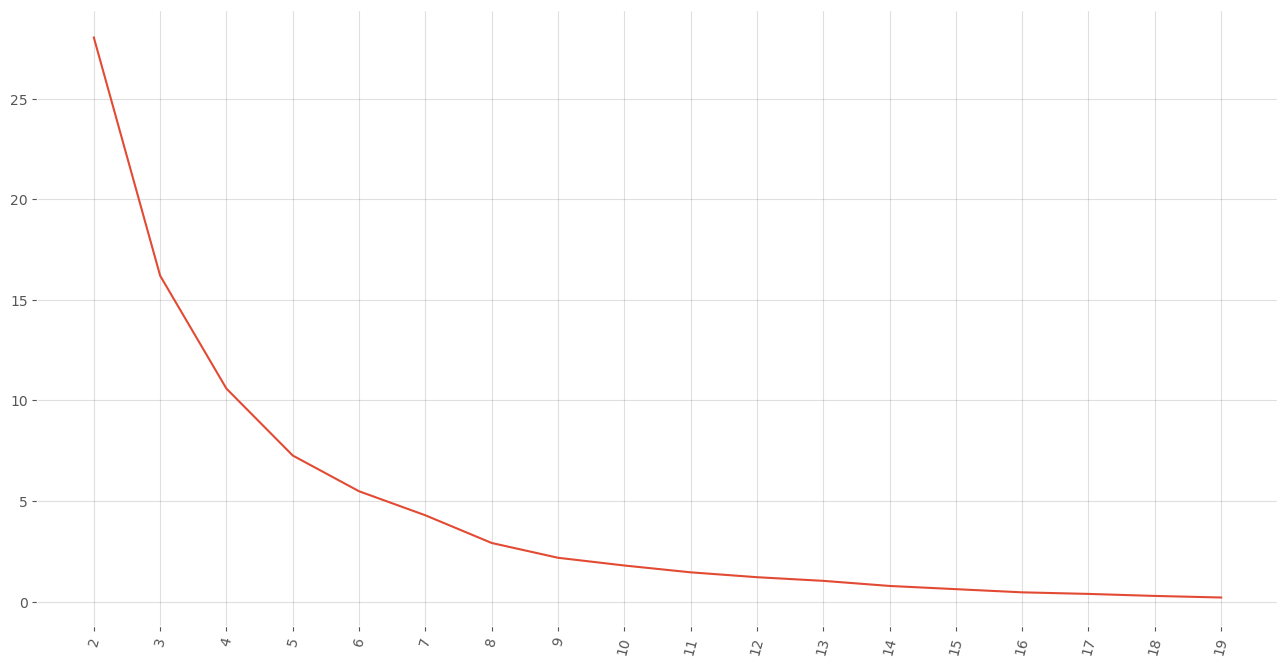

In [32]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

In [33]:
distorsions[1]

16.198652783231093

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


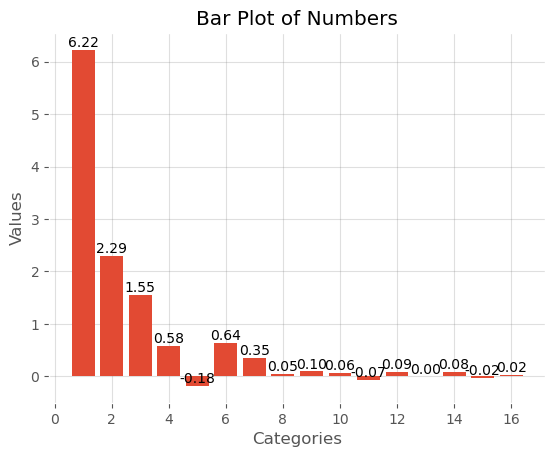

In [34]:
SSE_score = [np.nan]
for i in range(len(distorsions)-2):
    SSE_score += [distorsions[i+2]+distorsions[i]-2*distorsions[i+1]]
SSE_score += [np.nan]
plt.bar(range(len(SSE_score)), SSE_score)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot of Numbers')

# Add text labels on top of each bar
for i, value in enumerate(SSE_score):
    plt.text(i, value, str(f'{value:.2f}'), ha='center', va='bottom')
plt.show()

In [35]:
len(SSE_score)

18

#### Silhouette score

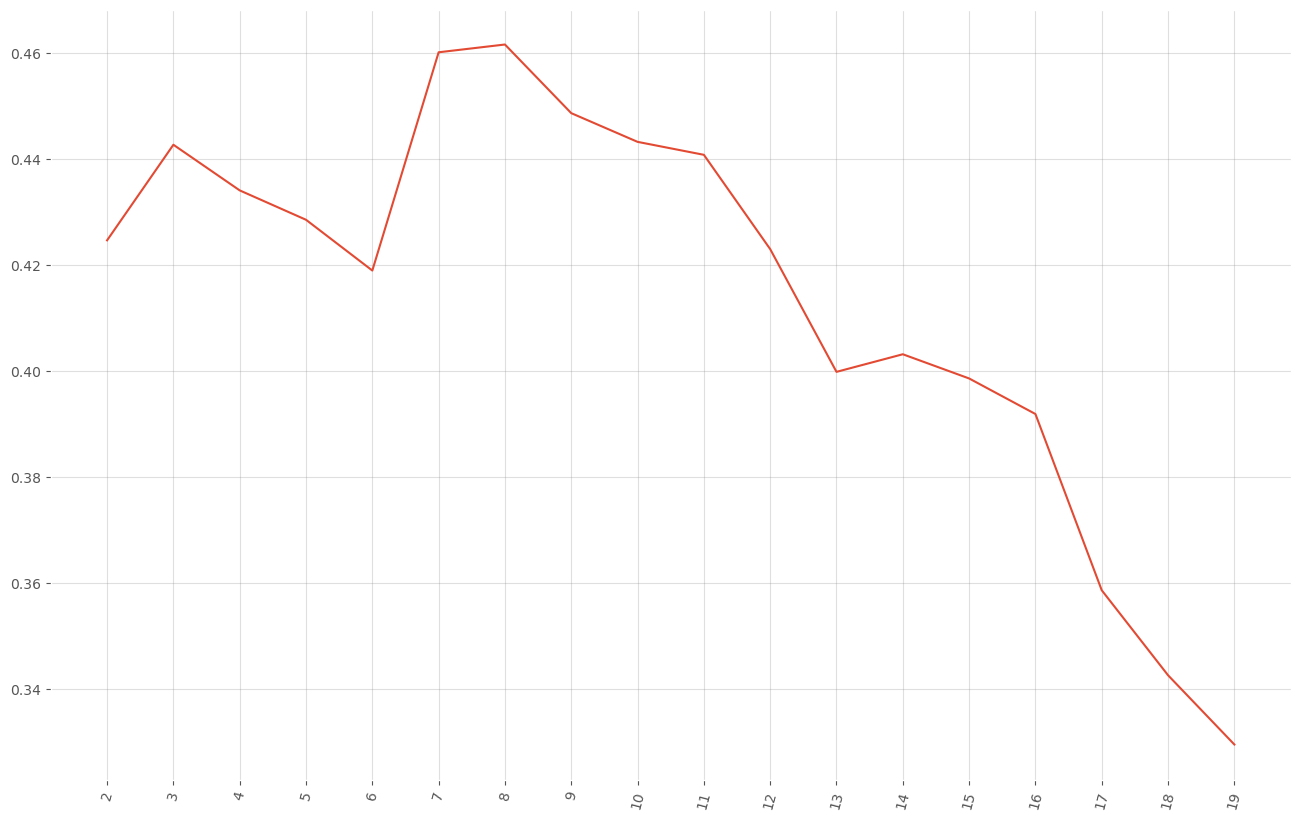

In [36]:
silhouette_score = []

for k in range(2, max_loop):
        kmeans = KMeans(n_clusters = k,  
                        random_state = 10, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

#### Clustering and Visualisation
> I will choose k-means model with FIVE clusters and visualize the results.

In [37]:
nclust = 5

In [38]:
# Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=5)

In [39]:
target_labels = k_means.predict(X)

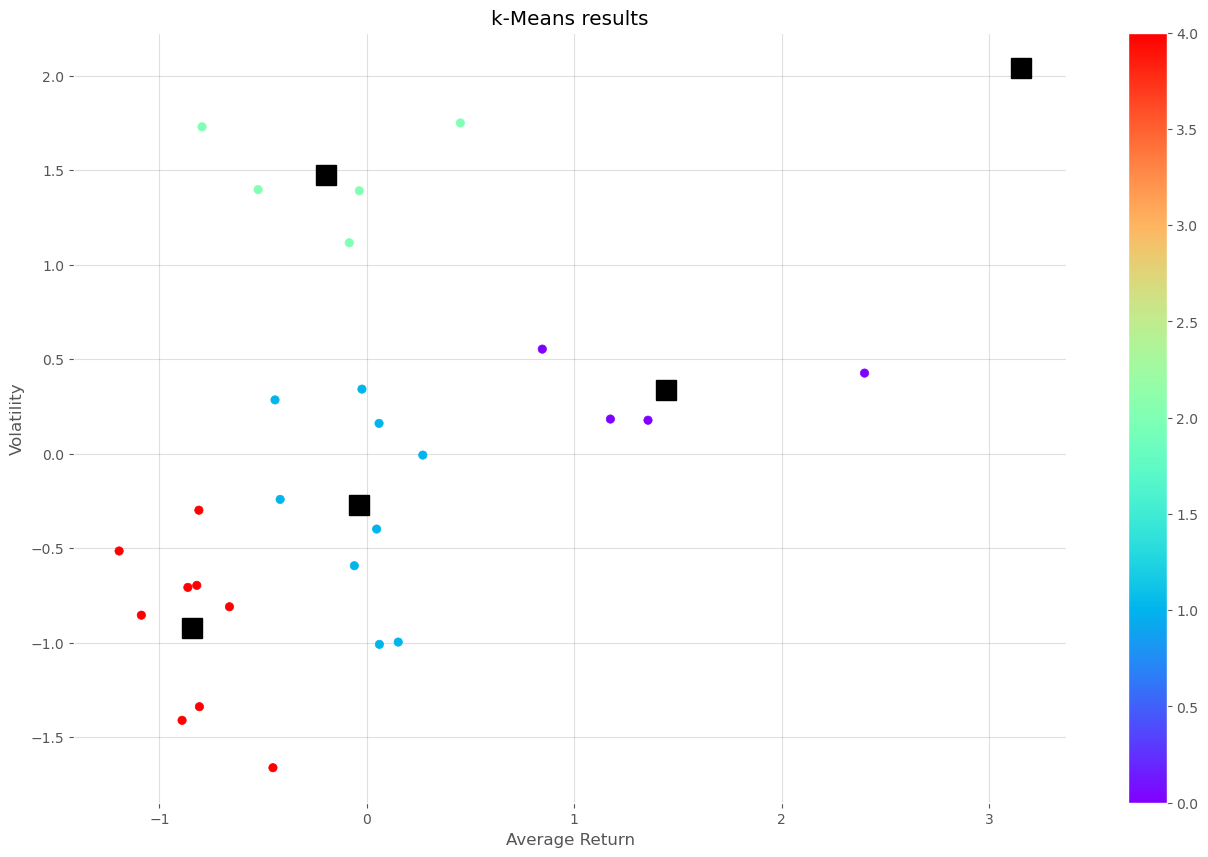

In [40]:
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = k_means.labels_, cmap = "rainbow", label = X.index)

ax.set_title("k-Means results")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

plt.plot(centroids[:,0], centroids[:,1], 'sg', markersize=15, color = "black")

Let us check the elements of the clusters

In [41]:
# show number of stocks in each cluster

clustered_series =\
(
    pd
    .Series(index = X.index, 
            data = k_means
                   .labels_
                   .flatten()
            )
)

In [42]:
# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

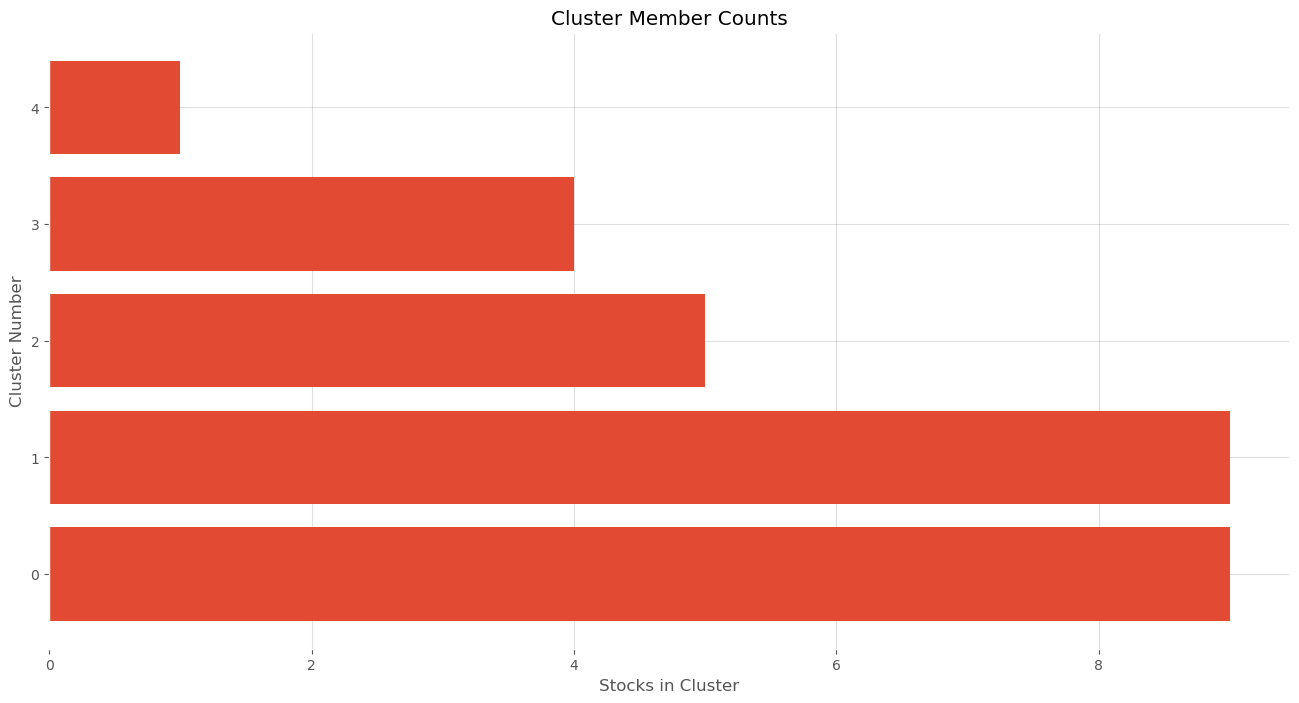

In [43]:
plt.figure(figsize=(16,8)
          )

plt.barh(
    range(len(clustered_series.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series.value_counts()
)

plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

plt.show()

### Hierarchical Clustering (Agglomerative Clustering)
> The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use `average` as the method since it minimizes the variants of distances between the clusters.

In [44]:
#Calulate linkage
Z = linkage(X, 
            method = "average")
Z[0]

array([20.   , 25.   ,  0.044,  2.   ])

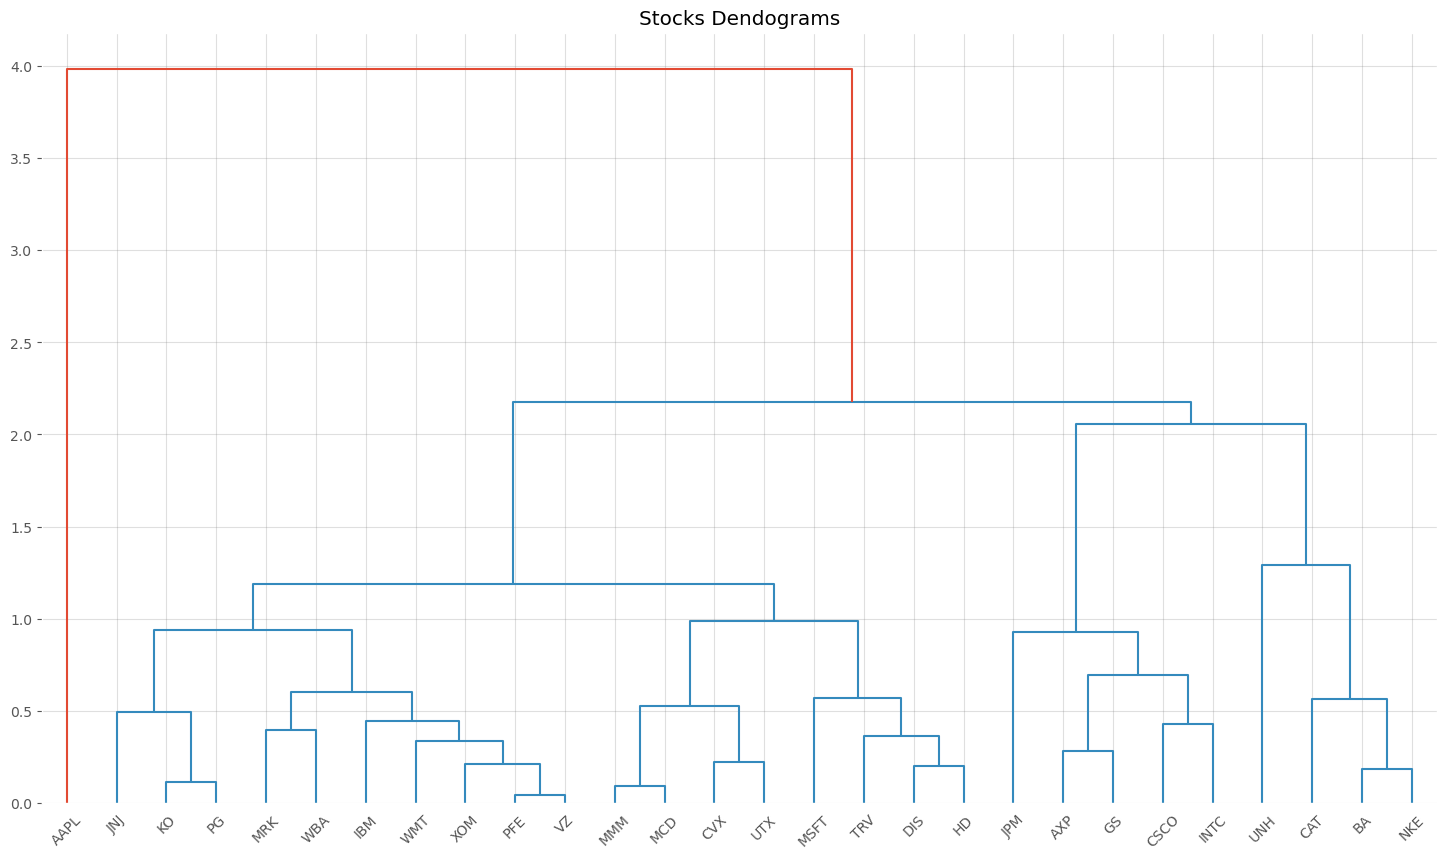

In [45]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

In [46]:
distance_threshold = 1.5

clusters = fcluster(Z, distance_threshold, criterion='distance')

chosen_clusters = pd.DataFrame(data=clusters, 
                               columns=['cluster']
                              )

chosen_clusters['cluster'].unique()

array([1, 2, 4, 3])

#### Clustering and Visualisation

In [47]:
nclust = 4

hc = AgglomerativeClustering(n_clusters = nclust, 
                             affinity = "euclidean", 
                             linkage = "ward")

clust_labels1 = hc.fit_predict(X)

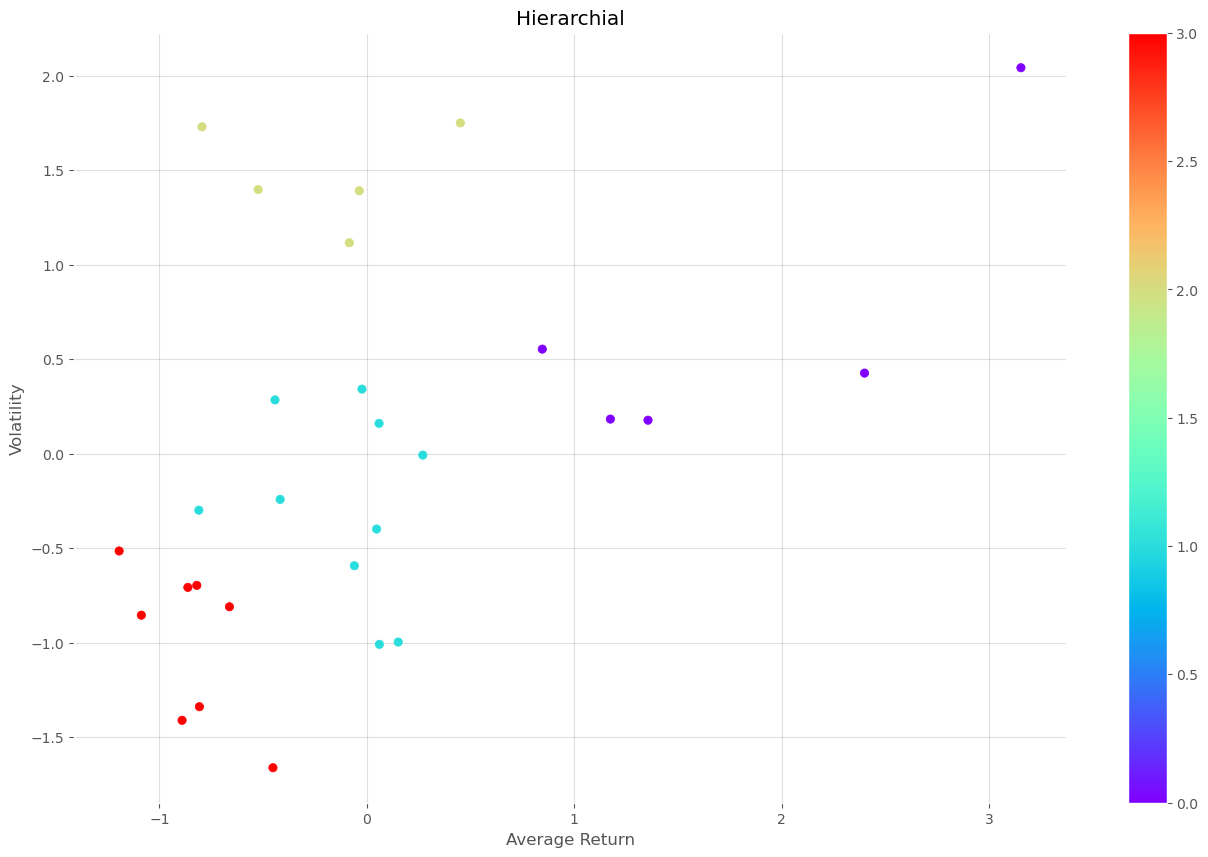

In [48]:
fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = clust_labels1, cmap = "rainbow")

ax.set_title("Hierarchial")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

> Similar to the plot of k-means clustering, we see that there are some distinct clusters
separated by different colors. 

### Affinity Propagation

In [49]:
ap = AffinityPropagation()

ap.fit(X)

clust_labels2 = ap.predict(X)

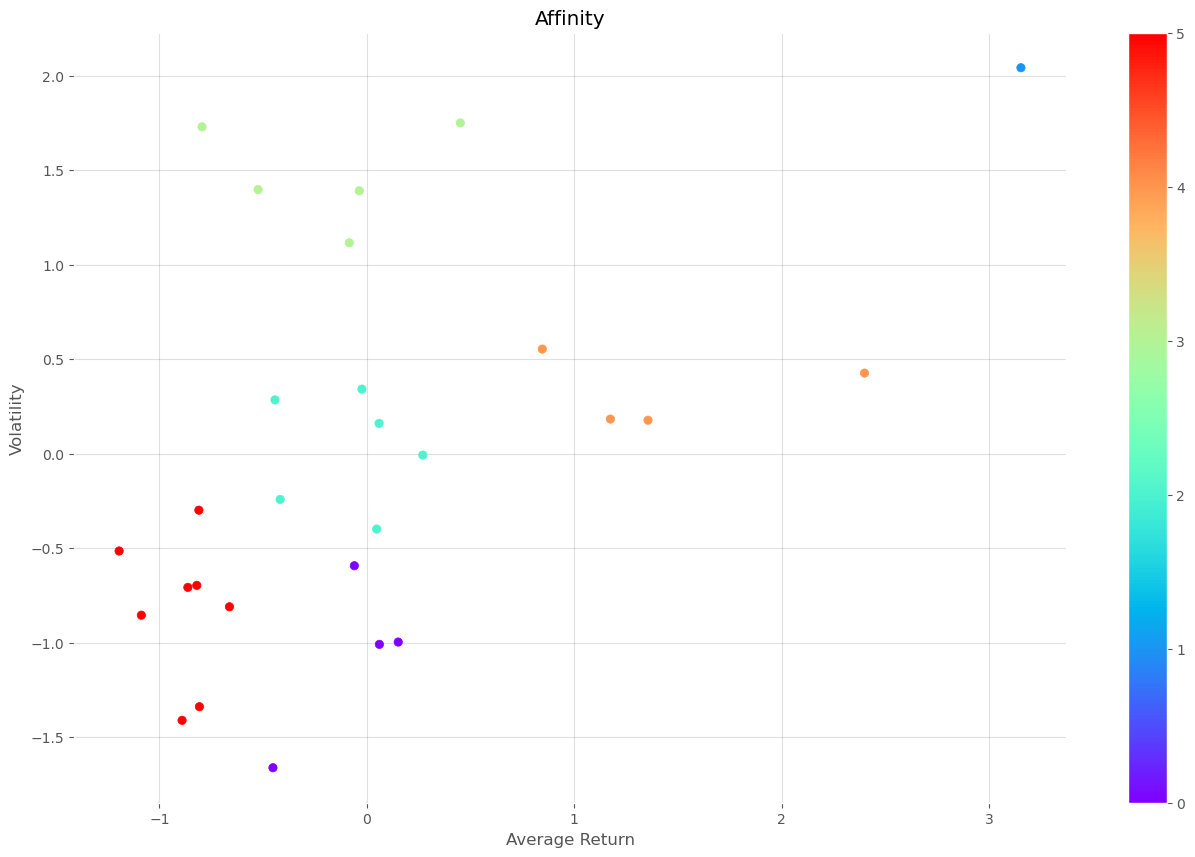

In [50]:
fig = plt.figure(figsize=(16,10)
                )
ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = clust_labels2, cmap = "rainbow")

ax.set_title("Affinity")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")
             
plt.colorbar(scatter)

### Cluster Visualisation

In [51]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 6


<Figure size 640x480 with 0 Axes>

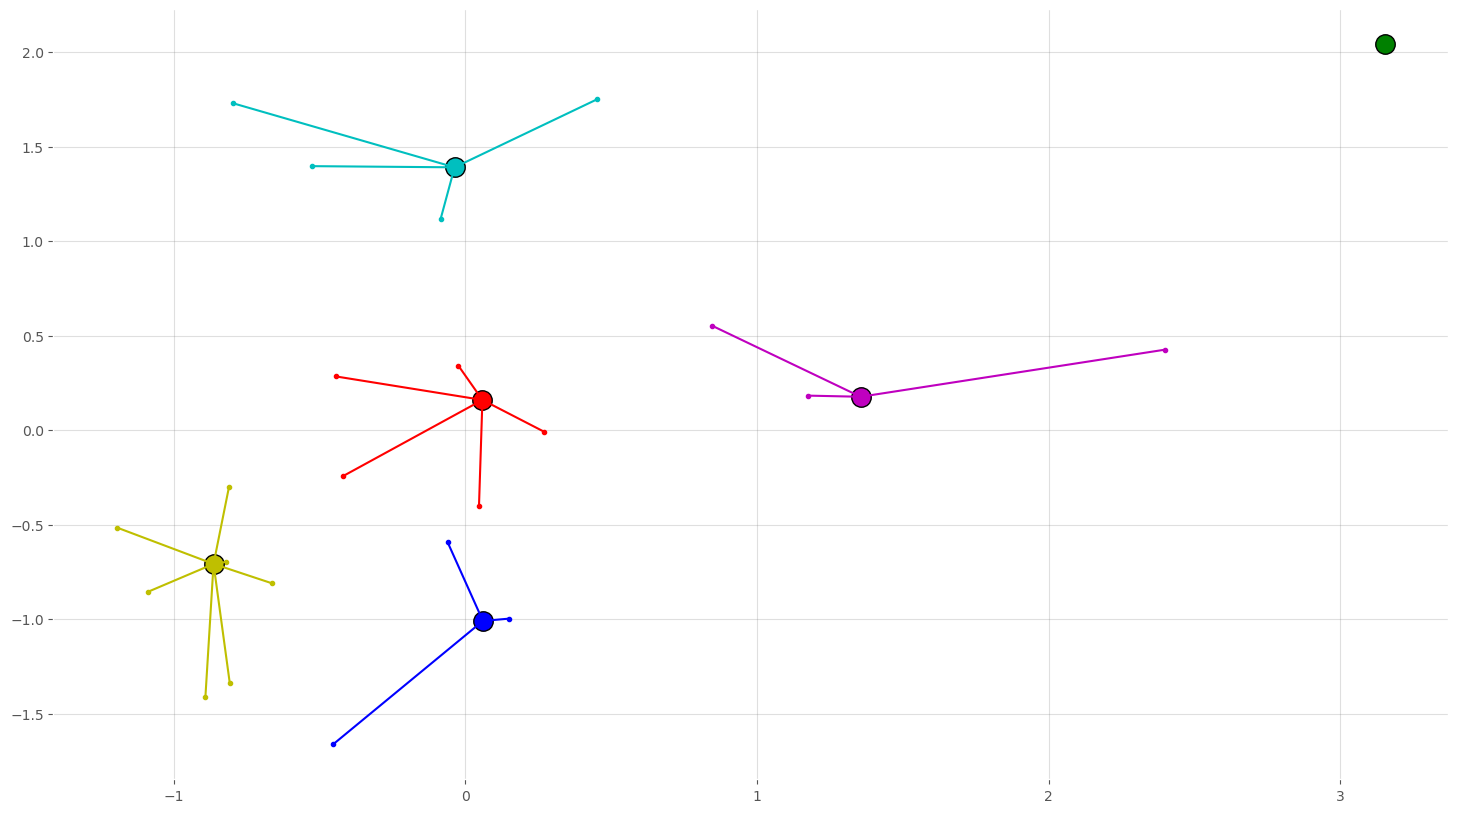

In [52]:
no_clusters = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % no_clusters)

# Plot exemplars

X_temp=np.asarray(X)
plt.close("all")
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(18,10)
                )
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

for k, col in zip(range(no_clusters), colors):
    
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + ".")
    
    plt.plot(cluster_center[0], cluster_center[1], 
             "o", 
             markerfacecolor = col, 
             markeredgecolor = "k", 
             markersize = 14)
    
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [53]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten()
                               )

# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

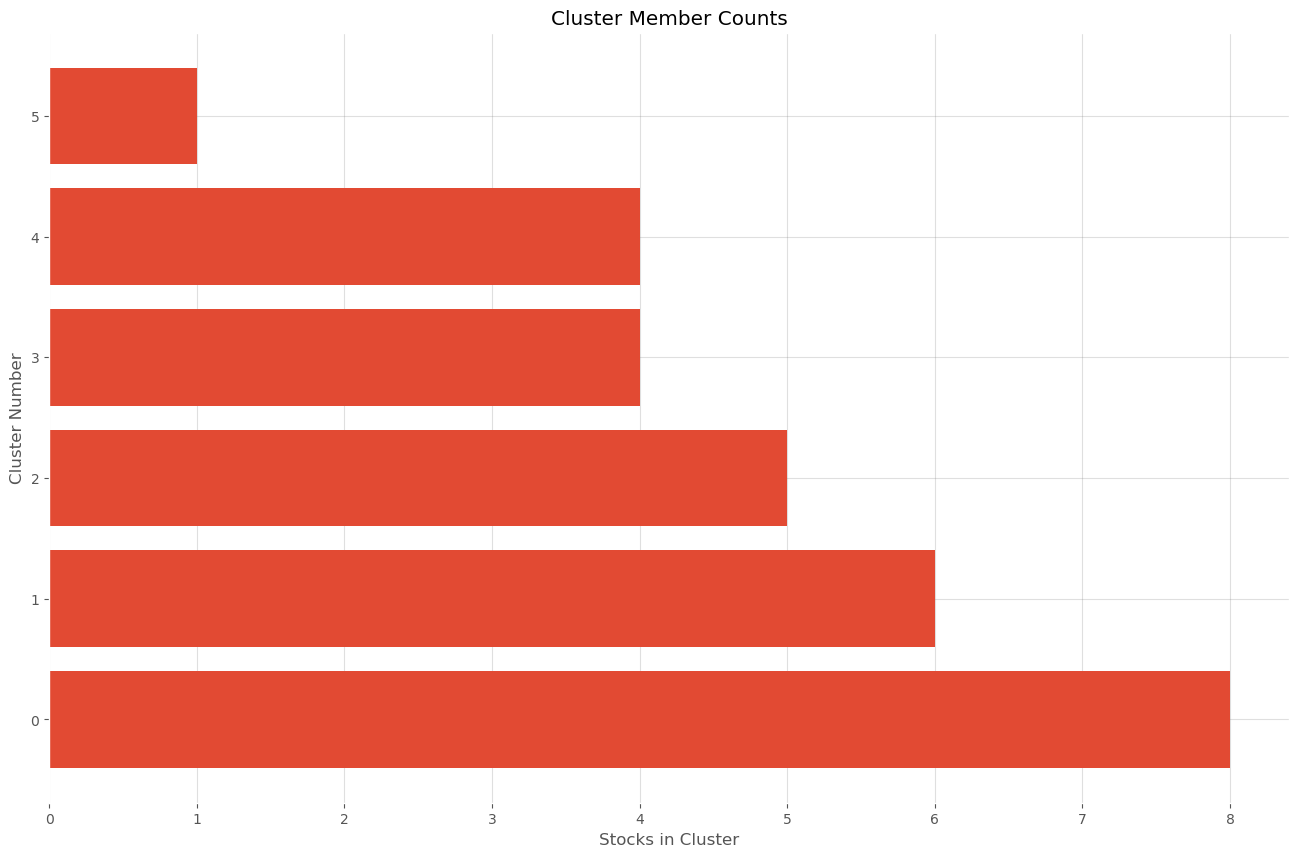

In [54]:
plt.figure(figsize=(16,10)
          )

plt.barh(
    range(len(clustered_series_ap.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series_ap.value_counts()
)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

### Cluster Evaluation

In [55]:
print("km", metrics.silhouette_score(X, k_means.labels_, 
                                     metric='euclidean')
     )

print("hc", metrics.silhouette_score(X, hc.fit_predict(X), 
                                     metric='euclidean')
     )

print("ap", metrics.silhouette_score(X, ap.labels_, 
                                     metric='euclidean')
     )

km 0.428483148662599
hc 0.3989796669952877
ap 0.408276245800909


### Visualising the return within a cluster
> To understand the intuition behind clustering, let us visualize the results of the clusters.

In [56]:
# All stock with its cluster label (including -1)
clustered_series = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                            )

# Clustered stock with its cluster label

clustered_series_all = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

In [57]:
# Get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# Let's visualize some clusters
cluster_vis_list = list(counts[(counts < 25) & (counts > 1)].index)[::-1]
cluster_vis_list

[4, 0, 3, 2, 5]

In [58]:
CLUSTER_SIZE_LIMIT = 9999

counts = clustered_series.value_counts()

ticker_count_reduced = counts[(counts>1) & (counts <= CLUSTER_SIZE_LIMIT)]

print ("Clusters formed: %d" % len(ticker_count_reduced)
      )
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)
                                 ).sum()
      )

Clusters formed: 5
Pairs to evaluate: 130


In [59]:
# plot a handful of the smallest clusters
plt.figure(figsize=(16,10)
          )
cluster_vis_list[0:min(len(cluster_vis_list), 4)]

[4, 0, 3, 2]

<Figure size 1600x1000 with 0 Axes>

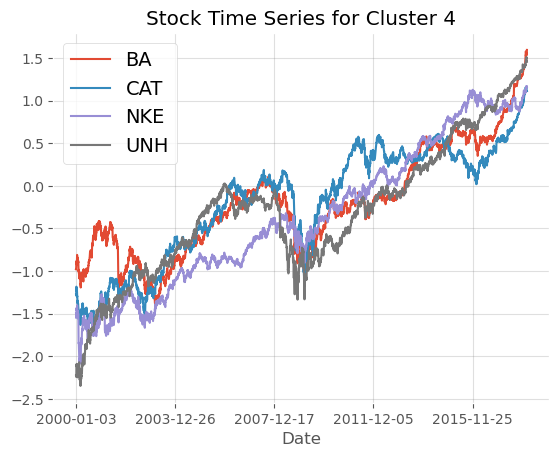

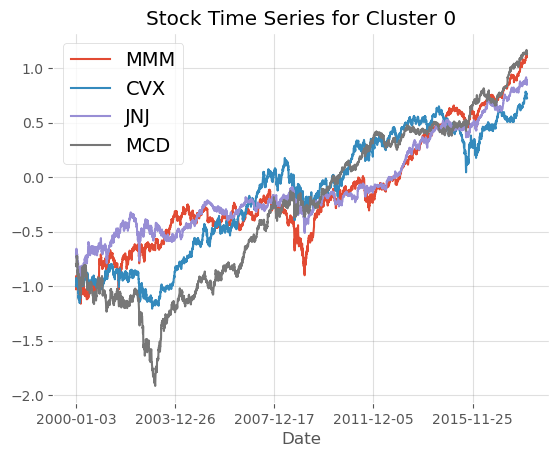

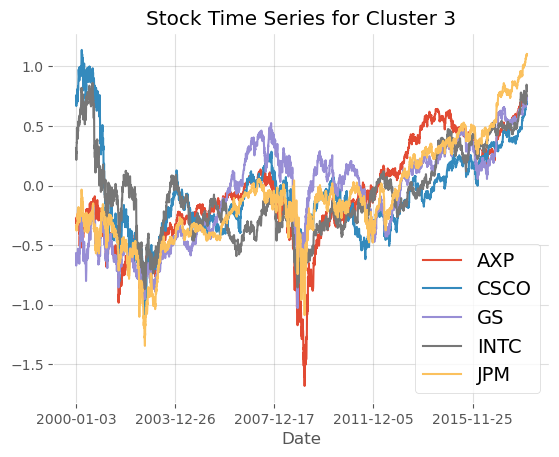

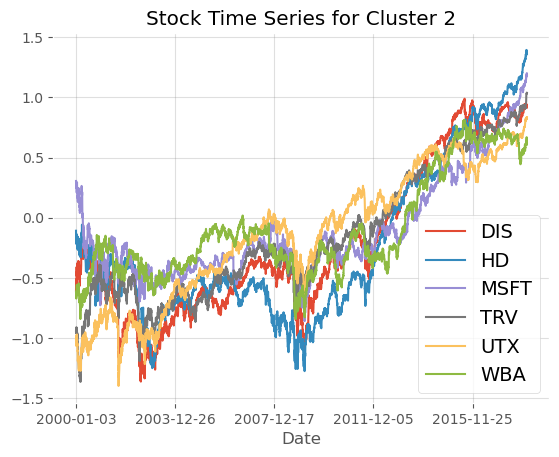

In [60]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]:
    
    tickers = list(clustered_series[clustered_series == clust].index)
    
    means = np.log(dataset.loc[:"2018-02-01", tickers].mean())
    
    data = np.log(dataset.loc[:"2018-02-01", tickers]).sub(means)
    
    data.plot(title='Stock Time Series for Cluster %d' % clust)
    
plt.show()

In [61]:
def find_cointegrated_pairs(data, significance=0.05):
    # Get the number of columns in the data (i.e., number of securities)
    n = data.shape[1]
    
    # Initialize a matrix filled with zeros to store cointegration scores
    score_matrix = np.zeros((n, n))
    
    # Initialize a matrix filled with ones to store p-values of the cointegration tests
    pvalue_matrix = np.ones((n, n))
    
    # Extract the column names (security names) from the data
    keys = data.keys()
    
    # List to store pairs of securities that are cointegrated
    pairs = []
    
    # Double loop to go through each combination of securities
    for i in range(n):  
        for j in range(i+1, n):
            
            # Extract the time series data for the two securities in consideration
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            
            # Perform the cointegration test between the two securities
            result = coint(S1, S2)
            
            # Extract the score (test statistic) and p-value from the result
            score = result[0]
            pvalue = result[1]
            
            # Store the score and p-value in their respective matrices
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            
            # If the p-value is less than the significance level, 
            # then the pair is considered cointegrated and added to the pairs list
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))

    # Return the score matrix, p-value matrix, and the list of cointegrated pairs
    return score_matrix, pvalue_matrix, pairs

In [62]:
cluster_dict = {}

for i, which_clust in enumerate(ticker_count_reduced.index):
    
    tickers = clustered_series[clustered_series == which_clust].index   
    
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(dataset[tickers]
                                   )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]["score_matrix"] = score_matrix
    cluster_dict[which_clust]["pvalue_matrix"] = pvalue_matrix
    cluster_dict[which_clust]["pairs"] = pairs

In [63]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]["pairs"])

In [64]:
print ("Number of pairs found : %d" % len(pairs)
      )
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)
                                                           )
      )

Number of pairs found : 11
In those pairs, there are 14 unique tickers.


In [65]:
pairs

[('KO', 'VZ'),
 ('KO', 'WMT'),
 ('MRK', 'PFE'),
 ('VZ', 'WMT'),
 ('DIS', 'TRV'),
 ('DIS', 'WBA'),
 ('CSCO', 'GS'),
 ('CSCO', 'INTC'),
 ('CSCO', 'JPM'),
 ('INTC', 'JPM'),
 ('MMM', 'JNJ')]

## <font color = blue> 👉 Questions 3 to 7 ask you to build, execute, and backtest a strategy, using both `MACD` and `RSI`. </font>

### <font color = green> Please combine the RSI and MACD strategies and own the stock if both RSI and MACD criteria provide a signal to buy. As to RSI, you will generalize the RSI threshold values to 50.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Microsoft (`MSFT`) is our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.
<br>
    
- Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

### <font color = green> NOTE: The MACD crossover strategy is defined as:    
    
- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.
    
### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [66]:
stock_ticker = ["MSFT"]
start_date = '2015-01-01'
end_date = '2018-01-01'

stock_data = yf.download(stock_ticker, start=start_date, end=end_date)
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.534836,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.162098,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.572628,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.075394,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.254341,29645200
...,...,...,...,...,...,...
2017-12-22,85.400002,85.629997,84.919998,85.510002,79.980309,14145800
2017-12-26,85.309998,85.529999,85.029999,85.400002,79.877419,9891200
2017-12-27,85.650002,85.980003,85.220001,85.709999,80.167358,14678000


In [67]:
data = stock_data[['Adj Close']]
data.columns = ["Close"]
data

,Close
Date,
2015-01-02,40.534836
2015-01-05,40.162098
2015-01-06,39.572628
2015-01-07,40.075394
2015-01-08,41.254341
...,...
2017-12-22,79.980309
2017-12-26,79.877419
2017-12-27,80.167358


### <font color = red> Answer 3 is presented in the cell below: </font>

In [68]:
def sig_MACD(stock, nshort=12, nlong=26, nsig=9):
    outcome = stock[['Close']]
    
    # Calculate the short-term Exponential Moving Average (EMA)
    outcome['short_ema'] = outcome['Close'].ewm(span=nshort, min_periods=1,
                                                adjust=False).mean()

    # Calculate the long-term Exponential Moving Average (EMA)
    outcome['long_ema'] = outcome['Close'].ewm(span=nlong, min_periods=1,
                                               adjust=False).mean()

    # Calculate the MACD line
    outcome['MACD_line'] = outcome['short_ema'] - outcome['long_ema']

    # Calculate the signal line
    outcome['MACD_sig'] = outcome['MACD_line'].ewm(span=nsig, min_periods=1,
                                                   adjust=False).mean()

    # Calculate the MACD histogram
    outcome['hist'] = outcome['MACD_line'] - outcome['MACD_sig'] 
    
    
    outcome["position"] = \
    (
        # whenever the signal line cross over MACD line
        np
        .where\
        ((outcome["MACD_sig"] > outcome["MACD_line"]), -1, 1)        
    )
    # as MACD only available after market closes with a 'Close' Price
    # Thus position only opened on next market day
    outcome["position"] = outcome["position"].shift(1)
    
    # it takes at least (long window + sig window) to get correct signal
    # before that all position shall be set to 0
    outcome["position"][:nlong+nsig] = 0
    # here I blank out first, but real life data shall be enough
    # to generate MACD on '2015-01-01'.
    
    outcome["position"].fillna(0, inplace = True)
    outcome["B_S"] = outcome["position"].diff()
    
    # sign the strategy as far as I understand is utilising 100% capital,
    # Buy and Sell does not contain size information here. The sign is enough
    outcome["B_S"] = np.sign(outcome["B_S"])
    
    outcome["B_S"].fillna(0, inplace=True)
    
    return outcome    

In [69]:
data_macd = sig_MACD(data)
data_macd

,Close,short_ema,long_ema,MACD_line,MACD_sig,hist,position,B_S
Date,,,,,,,,
2015-01-02,40.534836,40.534836,40.534836,0.000000,0.000000,0.000000,0.0,0.0
2015-01-05,40.162098,40.477492,40.507226,-0.029734,-0.005947,-0.023787,0.0,0.0
2015-01-06,39.572628,40.338282,40.437996,-0.099714,-0.024700,-0.075014,0.0,0.0
2015-01-07,40.075394,40.297837,40.411137,-0.113299,-0.042420,-0.070879,0.0,0.0
2015-01-08,41.254341,40.444992,40.473596,-0.028604,-0.039657,0.011053,0.0,0.0
...,...,...,...,...,...,...,...,...
2017-12-22,79.980309,79.671935,78.769542,0.902393,0.905002,-0.002609,1.0,0.0
2017-12-26,79.877419,79.703548,78.851607,0.851941,0.894389,-0.042449,-1.0,-1.0
2017-12-27,80.167358,79.774904,78.949070,0.825833,0.880678,-0.054845,-1.0,0.0


In [70]:
data_macd['B_S'].value_counts()

B_S
 0.0    699
 1.0     28
-1.0     28
Name: count, dtype: int64

In [71]:
def sig_RSI(stock, period, low_line=50):
    outcome = stock.copy()
    outcome.dropna(inplace = True)    
    outcome.columns = ['Close']

    outcome['Return'] = outcome['Close'].pct_change()
    outcome['Gain'] = np.where(outcome['Return'] < 0, 0, outcome['Return'])
    outcome['AG'] = outcome['Gain'].rolling(window=period).mean()        
    outcome['Loss'] = np.where(outcome['Return'] > 0, 0, outcome['Return'])
    outcome['AL'] = outcome['Loss'].rolling(window=period).mean()  
    outcome['RSI'] = 100 * (1 - 1 / (1+outcome['AG']/(-outcome['AL'])))
    outcome['Lower'] = low_line
    outcome['Higher'] = 100 - low_line
       
    outcome["position"] = np.nan
    flag = 0
    # it takes at least period of days to get correct signal
    # before that all position shall be set to 0    
    for idx in outcome.index[period:]:
        rsi = outcome.loc[idx, 'RSI']
        # rsi from 30 - 70
        if abs(rsi - 50) <= 50 - low_line:
            # flag is to rememeber if in a trading position
            if flag == 0:
                continue
            else:
                # we are in a trade right now
                if flag * (rsi - 50) > 0:
                # clear flag, ready for next trade signal
                    flag = 0
        # if rsi identified an strong momentum, trade on reversion.
        else:
            # rsi above 70
            if rsi > 100 - low_line:
                flag = -1
            
            # rsi below 30
            else:
                flag = 1
        outcome.loc[idx, 'position'] = flag  
   
    # as RSI only available after market closes with a 'Close' Price
    # Thus position only opened on next market day
    outcome["position"] = outcome["position"].shift(1)
    outcome["position"].fillna(0, inplace=True)        
    
    outcome["B_S"] = outcome["position"].diff()
    outcome["B_S"].fillna(0, inplace=True)
    return outcome

In [72]:
data_rsi = sig_RSI(data, 14)
data_rsi

,Close,Return,Gain,AG,Loss,AL,RSI,Lower,Higher,position,B_S
Date,,,,,,,,,,,
2015-01-02,40.534836,NaN,NaN,NaN,NaN,NaN,NaN,50,50,0.0,0.0
2015-01-05,40.162098,-0.009195,0.000000,NaN,-0.009195,NaN,NaN,50,50,0.0,0.0
2015-01-06,39.572628,-0.014677,0.000000,NaN,-0.014677,NaN,NaN,50,50,0.0,0.0
2015-01-07,40.075394,0.012705,0.012705,NaN,0.000000,NaN,NaN,50,50,0.0,0.0
2015-01-08,41.254341,0.029418,0.029418,NaN,0.000000,NaN,NaN,50,50,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,79.980309,0.000117,0.000117,0.005969,0.000000,-0.002111,73.876663,50,50,-1.0,0.0
2017-12-26,79.877419,-0.001286,0.000000,0.005519,-0.001286,-0.002202,71.477765,50,50,-1.0,0.0
2017-12-27,80.167358,0.003630,0.003630,0.004737,0.000000,-0.002202,68.261394,50,50,-1.0,0.0


In [73]:
data_rsi['B_S'].value_counts()

B_S
 0.0    650
 2.0     52
-2.0     52
-1.0      1
Name: count, dtype: int64

In [74]:
both_sig = pd.concat([data_macd[['Close', 'position']], data_rsi[['position']]],\
                     axis = 1)
both_sig.columns = ['Close', 'pos1', 'pos2']
both_sig

,Close,pos1,pos2
Date,,,
2015-01-02,40.534836,0.0,0.0
2015-01-05,40.162098,0.0,0.0
2015-01-06,39.572628,0.0,0.0
2015-01-07,40.075394,0.0,0.0
2015-01-08,41.254341,0.0,0.0
...,...,...,...
2017-12-22,79.980309,1.0,-1.0
2017-12-26,79.877419,-1.0,-1.0
2017-12-27,80.167358,-1.0,-1.0


In [75]:
def sig_final(df):
    outcome = df.copy()
    outcome['position'] = np.where(outcome['pos1']*outcome['pos1']>0, outcome['pos1'], 0)
    outcome['B_S'] = outcome['position'].diff()
    outcome["B_S"].fillna(0, inplace=True)    
    return outcome

In [76]:
data_sig = sig_final(both_sig)
data_sig

,Close,pos1,pos2,position,B_S
Date,,,,,
2015-01-02,40.534836,0.0,0.0,0.0,0.0
2015-01-05,40.162098,0.0,0.0,0.0,0.0
2015-01-06,39.572628,0.0,0.0,0.0,0.0
2015-01-07,40.075394,0.0,0.0,0.0,0.0
2015-01-08,41.254341,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2017-12-22,79.980309,1.0,-1.0,1.0,0.0
2017-12-26,79.877419,-1.0,-1.0,-1.0,-2.0
2017-12-27,80.167358,-1.0,-1.0,-1.0,0.0


In [77]:
data_sig['B_S'].value_counts()

B_S
 0.0    699
-2.0     28
 2.0     27
 1.0      1
Name: count, dtype: int64

In [78]:
def view_sig(signals):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(30, 20))

    # Plot the 'Close' price
    ax.plot(signals.index, signals['Close'], label='Price',
            linestyle='-', color='blue')

    # Plot buy positions with 'g^' format
    buy_positions = signals[signals['B_S'] > 0]
    ax.scatter(buy_positions.index, buy_positions['Close'],
               label='Buy', color='green', marker='^', s=100)

    # Plot sell positions with 'rv' format
    sell_positions = signals[signals['B_S'] < 0]
    ax.scatter(sell_positions.index, sell_positions['Close'],
               label='Sell Positions', color='red',
               marker='v', s=100)

    # Customize labels, title, and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.set_title('Buy and Sell Actions')
    ax.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

    return

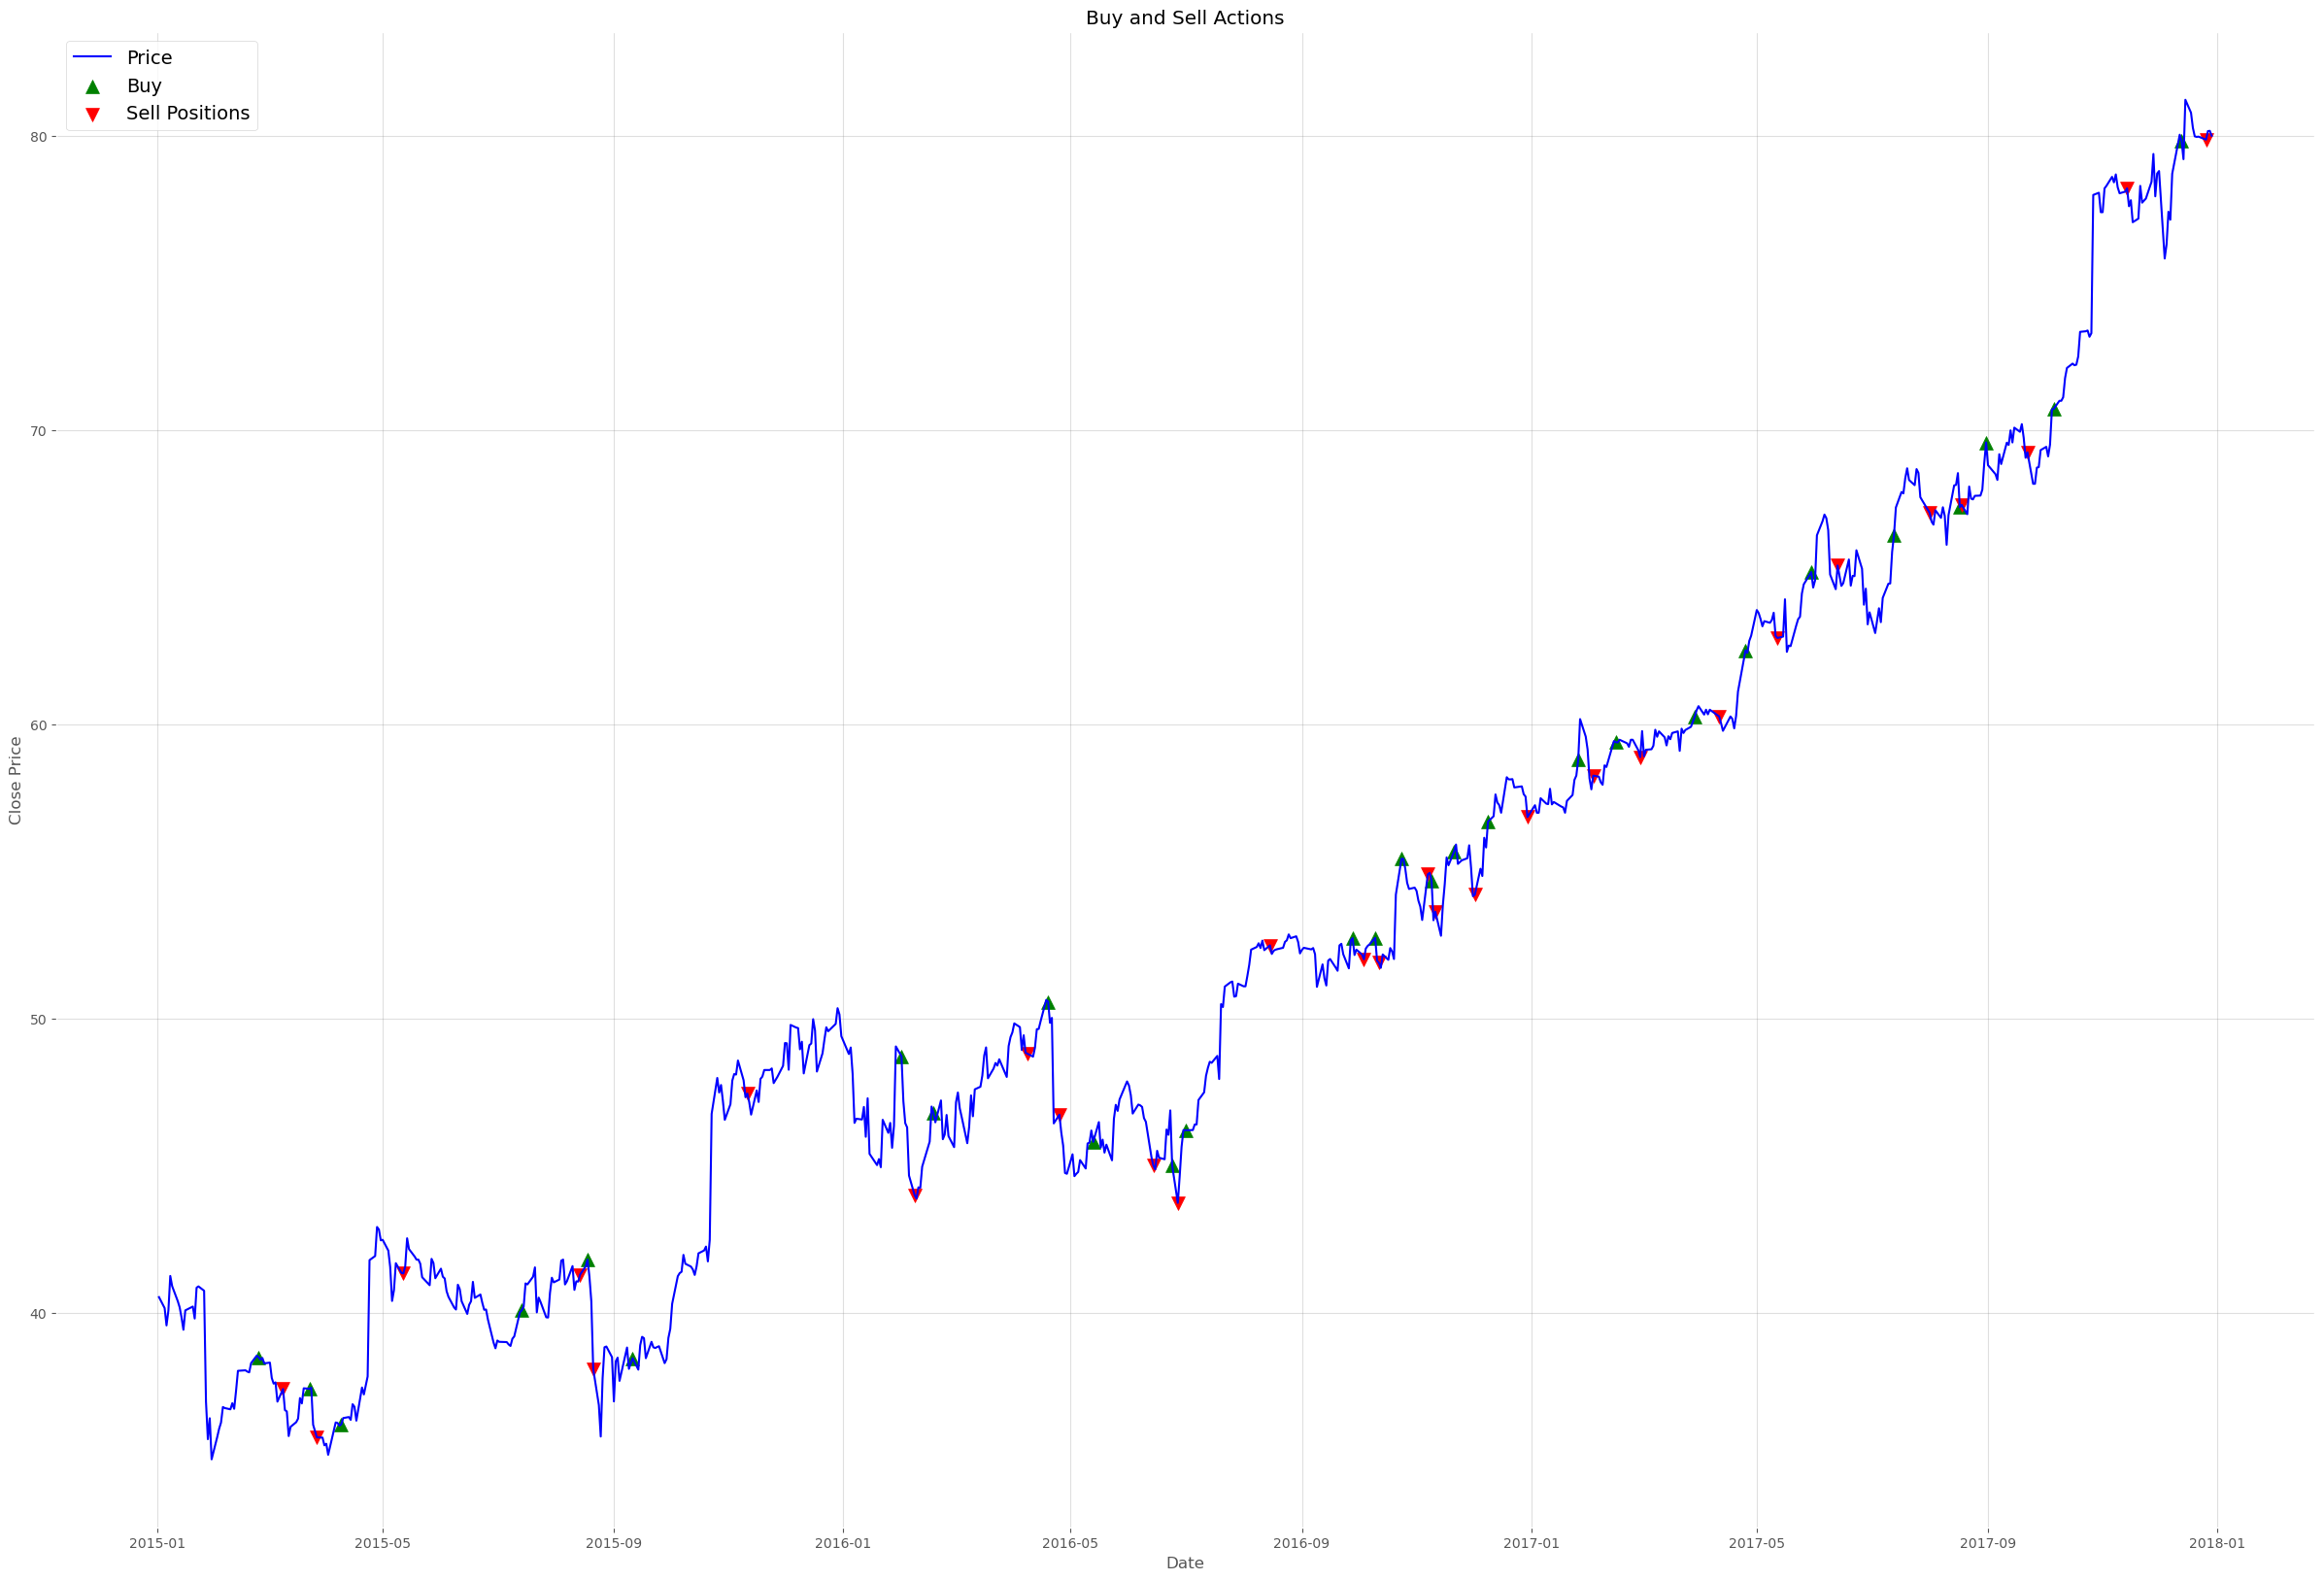

In [79]:
view_sig(data_sig)

### <font color = blue> 👉 Question 4</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [80]:
def cal_Sharpe(signals, capital, fee=0):
    portfolio =\
    (
    pd
    .DataFrame(index = signals.index)
    .fillna(0.0)
    )
    # record down the percent change ratio in underlying asset, the first row as 0
    portfolio['Asset_Rtn'] = signals["Close"].pct_change()
    portfolio['Asset_Rtn'].fillna(0, inplace=True)
    # record down if the change ratio affecting the portfolio value, the first row as 0
    portfolio['Holding'] = signals['position']                                               
    # use the actual holding direction to adjust on the sign of asset change ratio
    portfolio['Adj_Rtn'] = portfolio['Asset_Rtn']*portfolio['Holding']
    # fill in the actual total value based on trading activities
    portfolio['total'] = np.NaN
    temp_value = capital
    for idx in portfolio.index:
        # the commission fee is always to reduce the portfolio value
        temp_value = (1 + portfolio.loc[idx]['Adj_Rtn']) *\
                            (temp_value - fee * abs(signals.loc[idx]['B_S']))
        portfolio.loc[idx, 'total'] = temp_value 

    portfolio["returns"] =\
    (    portfolio["total"]
        .pct_change()
    )
    portfolio["returns"].fillna(0, inplace=True)
    
    Sharpe =\
    (
    np.sqrt(253) * (portfolio["returns"].mean() /\
                    portfolio["returns"].std()
                    )
    )

    CAGR =\
    (
        (
            (portfolio["total"][-1]) / capital
        )
            **(365.0/((signals.index[-1] -\
                       signals.index[0]).days) 
        ) 
        - 1
    )

    return [portfolio, Sharpe, CAGR]

In [81]:
start_capital = 1e5
commission = 5
data_both_result = cal_Sharpe(data_sig, start_capital, commission)
data_both_result[0]

,Asset_Rtn,Holding,Adj_Rtn,total,returns
Date,,,,,
2015-01-02,0.000000,0.0,0.000000,100000.000000,0.000000
2015-01-05,-0.009195,0.0,-0.000000,100000.000000,0.000000
2015-01-06,-0.014677,0.0,-0.000000,100000.000000,0.000000
2015-01-07,0.012705,0.0,0.000000,100000.000000,0.000000
2015-01-08,0.029418,0.0,0.000000,100000.000000,0.000000
...,...,...,...,...,...
2017-12-22,0.000117,1.0,0.000117,72169.604705,0.000117
2017-12-26,-0.001286,-1.0,0.001286,72252.433839,0.001148
2017-12-27,0.003630,-1.0,-0.003630,71990.171207,-0.003630


In [82]:
data_both_result[0]['total'][-1] / start_capital-1

-0.278670854280925

### <font color = red> Answer 4 </font>

    The answer is ____-27.86____ % .

### <font color = blue> 👉 Question 5</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [83]:
def cal_MDD(performs):
    MDD = \
    (
    pd
    .DataFrame(index = performs.index)
    .fillna(0.0)
    )
    
    MDD['Max'] = performs["total"].cummax()
    MDD['Drawdown'] = performs["total"] - MDD['Max']
    MDD['DD%'] = MDD['Drawdown'] / MDD['Max'] * 100
    
    MDD = MDD.dropna()
    
    MDD['DD_Flag'] = 0
    DD = []
    flag = 0
    nDD = 1
    
    for idx in MDD.index:
        if MDD.loc[idx]['Drawdown'] == 0:
            # flag is to rememeber if in DrawDown period
            if flag == 0:
                continue
            else:
                # a DD period is just ended
                # clear flag, ready for next DD seriel number
                flag = 0
                nDD += 1
        # if Drawdown < 0, entering a DD period
        else:
            flag = 1
            MDD.loc[idx, 'DD_Flag'] = nDD
            
    grouped = MDD[MDD['DD_Flag'] != 0].groupby('DD_Flag')
    index_values = performs

    for flags, group in grouped:
        
        s_date = group.index.min()
        e_date = group.index.max()
        # like how we opened position on the next day, close is also shifted
        if len(MDD[e_date:].index) > 1:
            e_date = MDD[e_date:].index[1]
 
        
        days = (e_date.to_pydatetime() - s_date.to_pydatetime()).days
        loss = group['Drawdown'].min()
        loss_pct = group['DD%'].min()

        DD += [[flags, s_date, e_date, days, loss, loss_pct]]
    DD = pd.DataFrame(DD)
    column_names = ['S/N', 'DD_start', 'DD_end', 'Days', 'DD_Max', 'DD%']
    
    DD.columns = column_names
    return [MDD, DD]

In [84]:
data_both_DD = cal_MDD(data_both_result[0])
data_both_DD[1].sort_values(by = 'DD%')

,S/N,DD_start,DD_end,Days,DD_Max,DD%
12,13,2016-01-22,2017-12-29,707,-72890.735697,-52.012238
0,1,2015-02-24,2015-04-24,59,-9949.421734,-9.949422
10,11,2015-11-09,2016-01-15,67,-12305.433587,-8.914613
5,6,2015-08-26,2015-10-06,41,-10026.048814,-8.540482
1,2,2015-04-29,2015-06-29,61,-6831.512208,-6.372628
4,5,2015-08-06,2015-08-24,18,-6464.919196,-5.821189
3,4,2015-07-22,2015-08-04,13,-4528.173139,-4.103162
2,3,2015-07-01,2015-07-21,20,-3405.302868,-3.103855
8,9,2015-10-27,2015-11-04,8,-4046.627791,-2.967765
6,7,2015-10-09,2015-10-16,7,-1935.299896,-1.622737


In [85]:
def view_MDD(porfolio, ticker_str):
    fig = plt.figure(figsize = [16, 8])

    porfolio[0]['total'].plot(color = "blue",
                        lw = 0.80,
                        label = "Max")
    porfolio[0]['total'].cummax().plot(color = "blue",
                        linestyle='--',                
                        lw = 0.80)                               

    # Add a legend
    plt.legend()
    # Set the y-label and plot title
    plt.ylabel('portfolio value')
    plt.title(ticker_str)

    plt.show()  
    return

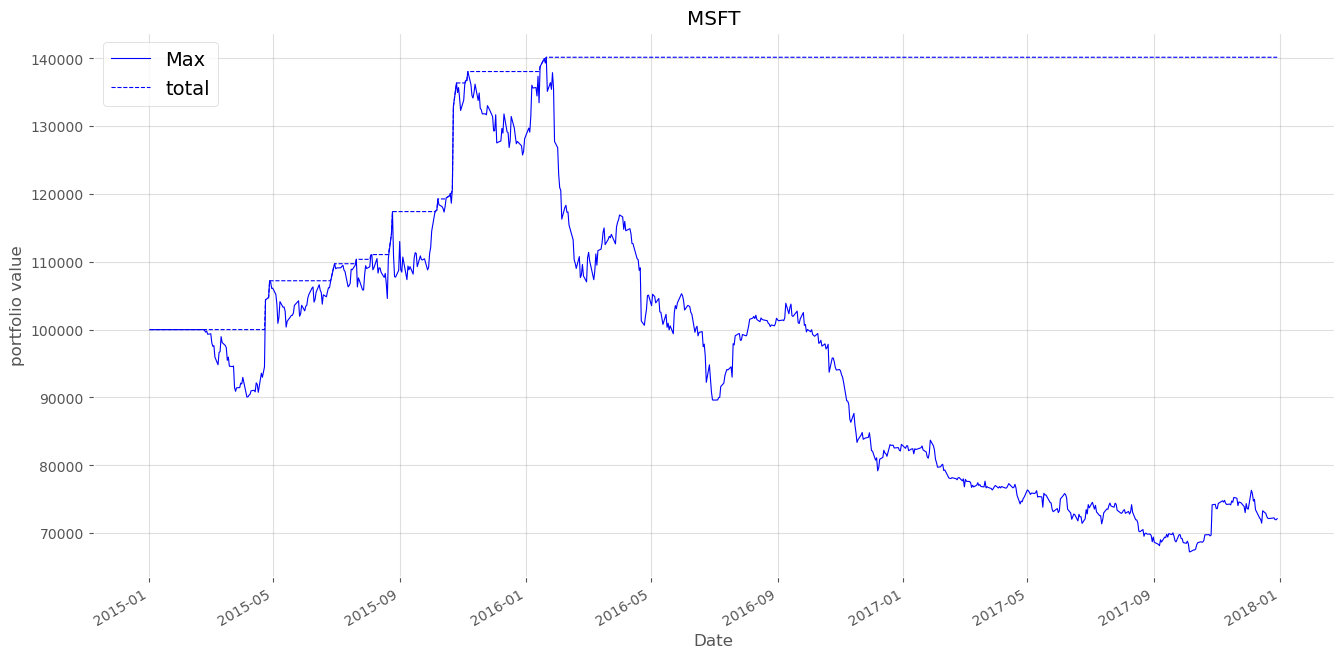

In [86]:
view_MDD(data_both_result, 'MSFT')

### <font color = red> Answer 5 </font>

    The Worst drawdown period     : Net drawdown ___52.01____ % | Duration ____707____ Days
    
    The 2nd worst drawdown period : Net drawdown _____9.95___ % | Duration ____59_____ Days
     
    The 3rd worst drawdown period : Net drawdown ____8.91____ % | Duration ____67______ Days
         
    The 4th worst drawdown period : Net drawdown ____8.54____ % | Duration ____41______ Days
    
    The 5th worst drawdown period : Net drawdown ____6.37____ % | Duration ____61______ Days

### <font color = blue> 👉 Question 6</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [87]:
def annual_perform_matrix(list_of_portfolios, list_of_ticker, list_year_seperation):
    # Define the to be returned DataFrame data as NaN
    data = np.NaN
    # Define your row names and column names
    row_names = []
    for i in range (len(list_year_seperation)-1):
        row_names += ['Year '+ list_year_seperation[i][:4]]
    col_names = list_of_ticker
    # Create the DataFrame
    df = pd.DataFrame(data, index=row_names, columns=col_names)
    
    for i in range(len(df)):
        for j in range(len(list_of_portfolios)):
            year = list_of_portfolios[j][0]\
                    .loc[list_year_seperation[i]:list_year_seperation[i+1]]
            df.iloc[i][list_of_ticker[j]] = \
                (year['total'][-1] / year['total'][0]-1)*100

    return df

In [88]:
year_seperation = ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01']
annual_perform_matrix([data_both_result], ['MSFT'], year_seperation)

,MSFT
Year 2015,28.125963
Year 2016,-35.933096
Year 2017,-12.570489


### <font color = red> Answer 6 </font>

    Below average year(s) : ___2016, 2017_____ 
    
    Above average year(s) : ____2015___ 
     

###  <font color = blue> 👉 Question 7. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [89]:
data_both_result[1]

-0.4044100651448212

### <font color = red> Answer 7 </font>
    
    Sharpe ratio: __-0.4044_____
    

###  <font color = blue> 👉 Question 8. </font> Please compare the above Sharpe ratio deploying RSI-MACD combined strategy, relative to the Sharpe ratio utilizing MACD strategy only. Which investment strategy performs better based on the Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [90]:
data_macd_result = cal_Sharpe(data_macd, start_capital, commission)

In [91]:
data_macd_result[1]

-0.39947951616476324

### <font color = red> Answer 8 </font>
    
    ______MACD alone (still losing)___________ strategy performs better.
    

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊